# Dataset Preprocessing

In [ ]:
'''
https://stackoverflow.com/a/46470146

'''


import numpy as np
import pandas as pd
import scipy.io as sio
# For Confusion Matrix HeatMap
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

x = sio.loadmat('/content/drive/MyDrive/distancematrices17itfeat08.MAT')
print(x.keys())


hsv = np.array(x["D_hsv"]) # color
hog = np.array(x["D_hog"]) # shape
siftint = np.array(x["D_siftint"]) # textures
siftbdy = np.array(x["D_siftbdy"]) # textures




'''
PENDING : IMPLEMENT LOGISTIC REGRESSION ON THIS ok

Features Recognition rate
HSV 43.0% ok
SIFT internal 55.1% ok
SIFT boundary 32.0% ok
HOG 49.6% ok
HSV + SIFT int 66.4% ok
HSV + SIFT bdy 57.0% ok 
HSV + HOG 62.1% ok
SIFT int + SIFT bdy 58.6% ok
SIFT int + HOG 66.4% ok
SIFT bdy + HOG 55.3% ok
HSV + SIFT int + HOG 71.8% ok
HSV + SIFT int + SIFT bd + HOG 72.8% ok
Table 1: Recognition performance on the test set. It can be seen
that combining the features within the kernel framework improves
the performance

1 -> model1 -> 3
2 -> model2 -> 4
3 -> model3 -> 1
4 -> model4 -> 3

1) hsv-siftint
2) hsv-siftbdy
3) hog-siftint
4) hog-siftbdy

1360
0-79 0
80-159 1

80% of 1360 -> train
20% of 1360 -> test


# feature extraction


'''
combinedArr = hsv
combinedArr = np.concatenate((combinedArr,hog),axis=1)
combinedArr = np.concatenate((combinedArr,siftint),axis=1)
combinedArr = np.concatenate((combinedArr,siftbdy),axis=1)
combinedArr = [pd.DataFrame(combinedArr)]




hsv_siftint = np.concatenate((hsv,siftint),axis=1) 
hsv_siftbdy = np.concatenate((hsv,siftbdy),axis=1)
hog_siftint = np.concatenate((hog,siftint),axis=1)
hog_siftbdy = np.concatenate((hog,siftbdy),axis=1)
hsv_hog     = np.concatenate((hsv,hog),axis=1)
siftint_siftbdy = np.concatenate((siftint,siftbdy),axis=1)
hsv_siftint_hog = np.concatenate((hsv,siftint,hog),axis=1)
hsv_siftint_siftbdy_hog = np.concatenate((hsv,siftint,siftbdy,hog),axis=1)


hsv_siftint = pd.DataFrame(hsv_siftint)
hsv_siftbdy = pd.DataFrame(hsv_siftbdy)
hog_siftint = pd.DataFrame(hog_siftint)
hog_siftbdy = pd.DataFrame(hog_siftbdy)
hsv_hog = pd.DataFrame(hsv_hog)
siftint_siftbdy = pd.DataFrame(siftint_siftbdy)
hsv_siftint_hog = pd.DataFrame(hsv_siftint_hog)
hsv_siftint_siftbdy_hog = pd.DataFrame(hsv_siftint_siftbdy_hog)
hsv = pd.DataFrame(hsv)
hog = pd.DataFrame(hog)
siftint = pd.DataFrame(siftint)
siftbdy = pd.DataFrame(siftbdy)

hsv_siftint = hsv_siftint/hsv_siftint.max().max()
hsv_siftbdy = hsv_siftbdy/hsv_siftbdy.max().max()
hog_siftint = hog_siftint/hog_siftint.max().max()
hog_siftbdy = hog_siftbdy/hog_siftbdy.max().max()
hsv_hog = hsv_hog/hsv_hog.max().max()
siftint_siftbdy = siftint_siftbdy/siftint_siftbdy.max().max()
hsv_siftint_hog = hsv_siftint_hog/hsv_siftint_hog.max().max()
hsv_siftint_siftbdy_hog = hsv_siftint_siftbdy_hog/hsv_siftint_siftbdy_hog.max().max()
hsv = hsv/hsv.max().max()
hog = hog.max().max()
siftint = siftint.max().max()
siftbdy = siftbdy.max().max()



myDatasets = {'hsv' : [hsv],'siftint' : [siftint], 'siftbdy' : [siftbdy], 'hog' : [hog], 'hsv_siftint' : [hsv_siftint], 'hsv_siftbdy' : [hsv_siftbdy],'hog_siftint' : [hog_siftint],'hog_siftbdy' : [hog_siftbdy], 'hsv_hog' : [hsv_hog], 'siftint_siftbdy' : [siftint_siftbdy], 'hsv_siftint_hog' : [hsv_siftint_hog], 'hsv_siftint_siftbdy_hog' : [hsv_siftint_siftbdy_hog] }





numClasses = 17 



images = [i for i in range(1360)]
labels = [int(y/80) for y in range(1360)]

# imagesShuffled, labelsShuffled = shuffle(images, labels)

# images = imagesShuffled
# labels = labelsShuffled

# 1360 * 1360

arr = [hsv_siftint,hsv_siftbdy,hog_siftint,hog_siftbdy]

print(arr[0].describe())

dict_keys(['__header__', '__version__', '__globals__', 'D_hog', 'D_hsv', 'D_siftbdy', 'D_siftint'])
              0            1     ...         2718         2719
count  1360.000000  1360.000000  ...  1360.000000  1360.000000
mean      0.818304     0.797474  ...     0.924197     0.900723
std       0.183677     0.177923  ...     0.044126     0.045942
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.693982     0.664980  ...     0.900173     0.873451
50%       0.873339     0.831939  ...     0.928326     0.900368
75%       0.983581     0.961388  ...     0.952161     0.931721
max       1.000000     1.000000  ...     1.000000     1.000000

[8 rows x 2720 columns]


# Confusion Matrix and Predicting the class

In [ ]:
def ConfusionMatrix(y_predicted,y_actual):
  confusionMatrix = np.zeros((numClasses,numClasses),dtype='int')

  for (i,j) in zip(y_predicted,y_actual):
    confusionMatrix[i][j] += 1;

  

  df_cm = pd.DataFrame(confusionMatrix, index = [i for i in range(17)],columns = [i for i in range(17)])
  plt.figure(figsize = (10,7))
  sn.heatmap(df_cm, annot=True)
  plt.show()


  
  # print('ConfusionMatrix : \n\n',confusionMatrix)

  precision_recall = np.empty([17, 2], dtype = float)

  print('\n')

  for i in range(len(confusionMatrix)):
    # print('precision for ',i,' class : ',confusionMatrix[i][i]/(sum(confusionMatrix[i])))
    precision_recall[i][0] = confusionMatrix[i][i]/(sum(confusionMatrix[i]))

  print()

  colWiseSum_ConfusionMatrix = np.sum(confusionMatrix,axis=0)
  for i in range(len(colWiseSum_ConfusionMatrix)):
    # print('recall for ',i,' class : ',confusionMatrix[i][i]/(colWiseSum_ConfusionMatrix[i]))
    precision_recall[i][1] = confusionMatrix[i][i]/(colWiseSum_ConfusionMatrix[i])

  # print(precision_recall)
  precision_recall = pd.DataFrame(precision_recall,columns=['precision','recall'])
  print(precision_recall)

  precision_recall.to_csv('/content/drive/MyDrive/ML project results.csv',mode='a', header=False)



  return confusionMatrix

def predictTheClass(x_test_index,y_test,models,arr):

  y_predicted = []


  for xi,y in zip(x_test_index,y_test):
    predicted_values = {};

    for j in range(len(models)):
      predicted_val = (models[j].predict([arr[j].iloc[xi]]))[0]
      
      if predicted_val in predicted_values:
        predicted_values[predicted_val] += 1
      else :
        predicted_values[predicted_val] = 1

    # as there only 17 classes, so for intialization considering 100th class frequency as zero.
    maxFreqKey = 100

    predicted_values[100] = 0


    for key,val in predicted_values.items():
      if(predicted_values[maxFreqKey] < val):
        maxFreqKey = key

    y_predicted.append(maxFreqKey)

  return y_predicted

def findAccuracy(y_predicted,y_actual):

  correctlyPredicted = 0
  totalSamples = len(y_predicted)

  for (predicted,actual) in zip(y_predicted,y_actual):
    if(predicted == actual):
      correctlyPredicted += 1
  
  accuracyPercentage = (correctlyPredicted*100)/totalSamples
  # print('Accuracy Percentage : ', accuracyPercentage)
  
  return accuracyPercentage

# LOGISTIC REGRESSION WITH K-Fold ||  K = 5 || k = 10

LOGISTIC REGRESSION WITH K-Fold ||  K = 5


FOLD :  1


-------------------------------------------------------
Model 0 Score :  79.04411764705883
Model 1 Score :  71.32352941176471
Model 2 Score :  66.91176470588235
Model 3 Score :  59.92647058823529
Accuracy Percentage :  79.41176470588235


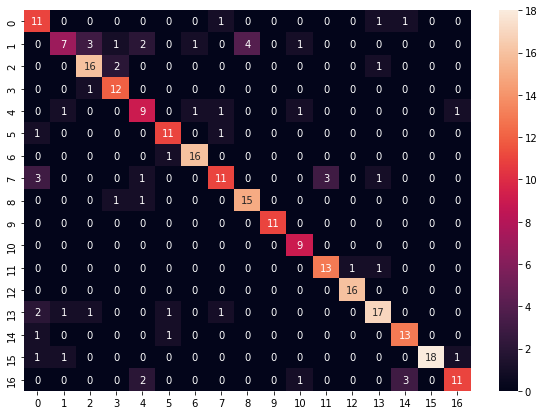




    precision    recall
0    0.785714  0.578947
1    0.368421  0.700000
2    0.842105  0.761905
3    0.923077  0.750000
4    0.642857  0.600000
5    0.846154  0.785714
6    0.941176  0.888889
7    0.578947  0.733333
8    0.882353  0.789474
9    1.000000  1.000000
10   1.000000  0.750000
11   0.866667  0.812500
12   1.000000  0.941176
13   0.739130  0.809524
14   0.866667  0.764706
15   0.857143  1.000000
16   0.647059  0.846154
-------------------------------------------------------

FOLD :  2


-------------------------------------------------------
Model 0 Score :  76.10294117647058
Model 1 Score :  73.89705882352942
Model 2 Score :  68.75
Model 3 Score :  60.29411764705882
Accuracy Percentage :  77.57352941176471


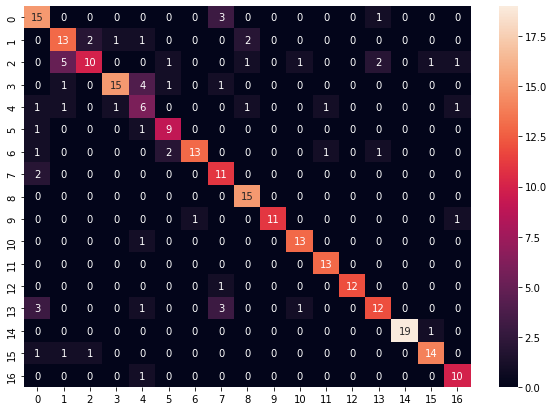




    precision    recall
0    0.789474  0.625000
1    0.684211  0.619048
2    0.454545  0.769231
3    0.681818  0.882353
4    0.500000  0.400000
5    0.818182  0.692308
6    0.722222  0.928571
7    0.846154  0.578947
8    1.000000  0.789474
9    0.846154  1.000000
10   0.928571  0.866667
11   1.000000  0.866667
12   0.923077  1.000000
13   0.600000  0.750000
14   0.950000  1.000000
15   0.823529  0.875000
16   0.909091  0.769231
-------------------------------------------------------

FOLD :  3


-------------------------------------------------------
Model 0 Score :  82.35294117647058
Model 1 Score :  71.69117647058823
Model 2 Score :  69.48529411764706
Model 3 Score :  58.82352941176471
Accuracy Percentage :  82.3529411764706


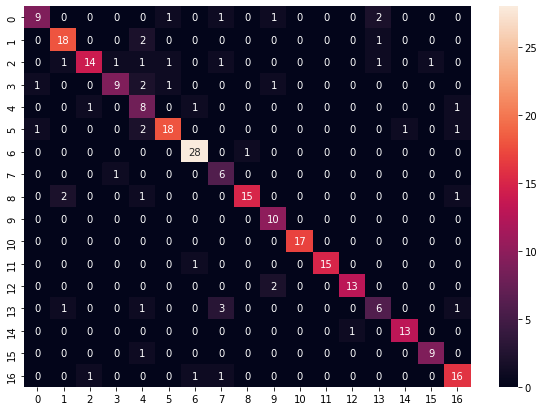




    precision    recall
0    0.642857  0.818182
1    0.857143  0.818182
2    0.666667  0.875000
3    0.642857  0.818182
4    0.727273  0.444444
5    0.782609  0.857143
6    0.965517  0.903226
7    0.857143  0.500000
8    0.789474  0.937500
9    1.000000  0.714286
10   1.000000  1.000000
11   0.937500  1.000000
12   0.866667  0.928571
13   0.500000  0.600000
14   0.928571  0.928571
15   0.900000  0.900000
16   0.842105  0.800000
-------------------------------------------------------

FOLD :  4


-------------------------------------------------------
Model 0 Score :  86.39705882352942
Model 1 Score :  74.26470588235294
Model 2 Score :  72.05882352941177
Model 3 Score :  61.76470588235294
Accuracy Percentage :  84.92647058823529


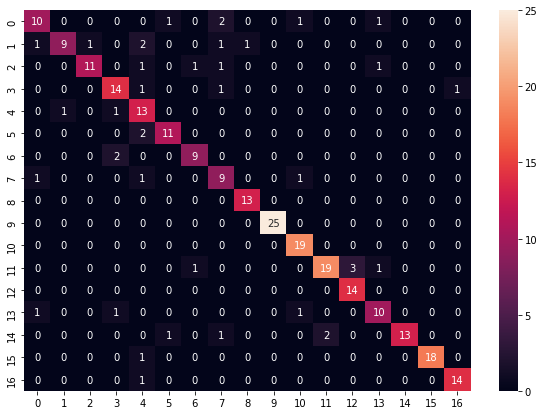




    precision    recall
0    0.666667  0.769231
1    0.600000  0.900000
2    0.733333  0.916667
3    0.823529  0.777778
4    0.866667  0.590909
5    0.846154  0.846154
6    0.818182  0.818182
7    0.750000  0.600000
8    1.000000  0.928571
9    1.000000  1.000000
10   1.000000  0.863636
11   0.791667  0.904762
12   1.000000  0.823529
13   0.769231  0.769231
14   0.764706  1.000000
15   0.947368  1.000000
16   0.933333  0.933333
-------------------------------------------------------

FOLD :  5


-------------------------------------------------------
Model 0 Score :  74.26470588235294
Model 1 Score :  75.0
Model 2 Score :  66.17647058823529
Model 3 Score :  61.76470588235294
Accuracy Percentage :  77.94117647058823


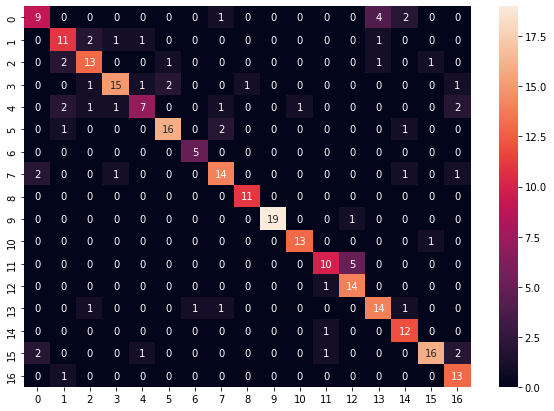




    precision    recall
0    0.562500  0.692308
1    0.687500  0.647059
2    0.722222  0.722222
3    0.714286  0.833333
4    0.466667  0.700000
5    0.800000  0.842105
6    1.000000  0.833333
7    0.736842  0.736842
8    1.000000  0.916667
9    0.950000  1.000000
10   0.928571  0.928571
11   0.666667  0.769231
12   0.933333  0.700000
13   0.777778  0.700000
14   0.923077  0.705882
15   0.727273  0.888889
16   0.928571  0.684211
-------------------------------------------------------
Average Accuracy :  80.44117647058825


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)




def KFold(images,labels):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = LogisticRegression()
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    print('\nFOLD : ', folditer)

    print('\n')

    print('-------------------------------------------------------')

    for i in range(len(models)):
      x_test = arr[i].iloc[test_index]
      print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    print('Accuracy Percentage : ', Accuracy)
    
    ConfusionMatrix(y_predicted,y_test)

    print('-------------------------------------------------------')

  
  print('Average Accuracy : ', avgAccuracy/5)




KFold(images.copy(),labels.copy())

LOGISTIC REGRESSION WITH K-Fold ||  K = 10


FOLD :  1


-------------------------------------------------------
Model 0 Score :  79.41176470588235
Model 1 Score :  72.79411764705883
Model 2 Score :  70.58823529411765
Model 3 Score :  59.55882352941176
Accuracy Percentage :  80.1470588235294


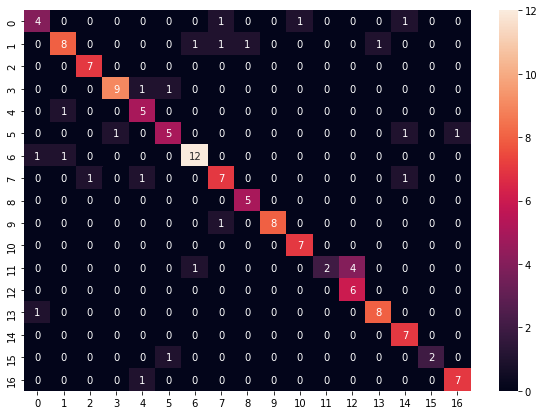




    precision    recall
0    0.571429  0.666667
1    0.666667  0.800000
2    1.000000  0.875000
3    0.818182  0.900000
4    0.833333  0.625000
5    0.625000  0.714286
6    0.857143  0.857143
7    0.700000  0.700000
8    1.000000  0.833333
9    0.888889  1.000000
10   1.000000  0.875000
11   0.285714  1.000000
12   1.000000  0.600000
13   0.888889  0.888889
14   1.000000  0.700000
15   0.666667  1.000000
16   0.875000  0.875000
-------------------------------------------------------

FOLD :  2


-------------------------------------------------------
Model 0 Score :  83.08823529411765
Model 1 Score :  76.47058823529412
Model 2 Score :  65.44117647058823
Model 3 Score :  61.029411764705884
Accuracy Percentage :  86.02941176470588


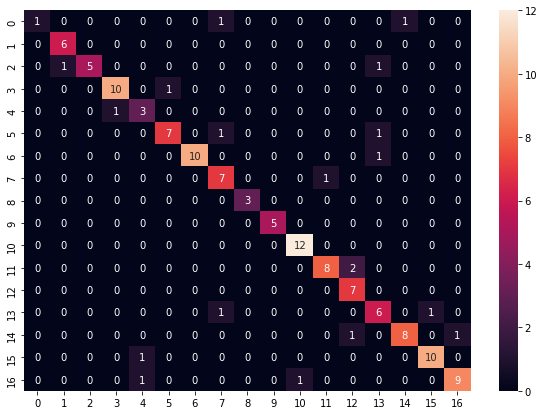




    precision    recall
0    0.333333  1.000000
1    1.000000  0.857143
2    0.714286  1.000000
3    0.909091  0.909091
4    0.750000  0.600000
5    0.777778  0.875000
6    0.909091  1.000000
7    0.875000  0.700000
8    1.000000  1.000000
9    1.000000  1.000000
10   1.000000  0.923077
11   0.800000  0.888889
12   1.000000  0.700000
13   0.750000  0.666667
14   0.800000  0.888889
15   0.909091  0.909091
16   0.818182  0.900000
-------------------------------------------------------

FOLD :  3


-------------------------------------------------------
Model 0 Score :  80.88235294117648
Model 1 Score :  77.94117647058823
Model 2 Score :  69.85294117647058
Model 3 Score :  63.23529411764706
Accuracy Percentage :  80.88235294117646


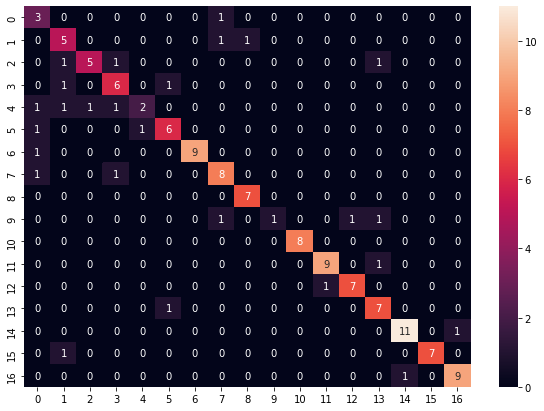




    precision    recall
0    0.750000  0.428571
1    0.714286  0.555556
2    0.625000  0.833333
3    0.750000  0.666667
4    0.333333  0.666667
5    0.750000  0.750000
6    0.900000  1.000000
7    0.800000  0.727273
8    1.000000  0.875000
9    0.250000  1.000000
10   1.000000  1.000000
11   0.900000  0.900000
12   0.875000  0.875000
13   0.875000  0.700000
14   0.916667  0.916667
15   0.875000  1.000000
16   0.900000  0.900000
-------------------------------------------------------

FOLD :  4


-------------------------------------------------------
Model 0 Score :  84.55882352941177
Model 1 Score :  82.35294117647058
Model 2 Score :  69.85294117647058
Model 3 Score :  61.029411764705884
Accuracy Percentage :  84.55882352941177


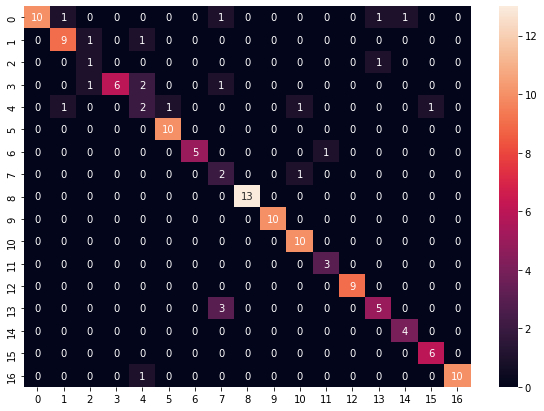




    precision    recall
0    0.714286  1.000000
1    0.818182  0.818182
2    0.500000  0.333333
3    0.600000  1.000000
4    0.333333  0.333333
5    1.000000  0.909091
6    0.833333  1.000000
7    0.666667  0.285714
8    1.000000  1.000000
9    1.000000  1.000000
10   1.000000  0.833333
11   1.000000  0.750000
12   1.000000  1.000000
13   0.625000  0.714286
14   1.000000  0.800000
15   1.000000  0.857143
16   0.909091  1.000000
-------------------------------------------------------

FOLD :  5


-------------------------------------------------------
Model 0 Score :  67.64705882352942
Model 1 Score :  61.029411764705884
Model 2 Score :  66.91176470588235
Model 3 Score :  53.67647058823529
Accuracy Percentage :  69.8529411764706


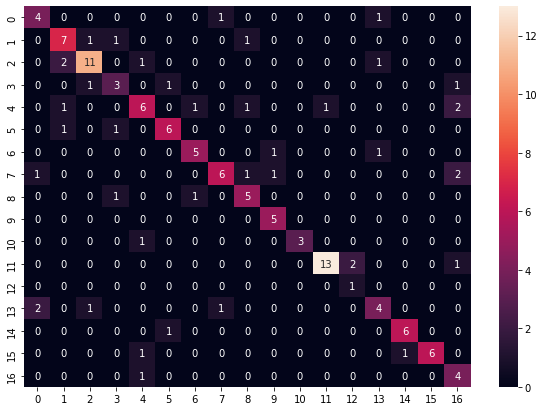




    precision    recall
0    0.666667  0.571429
1    0.700000  0.636364
2    0.733333  0.785714
3    0.500000  0.500000
4    0.500000  0.600000
5    0.750000  0.750000
6    0.714286  0.714286
7    0.545455  0.750000
8    0.714286  0.625000
9    1.000000  0.714286
10   0.750000  1.000000
11   0.812500  0.928571
12   1.000000  0.333333
13   0.500000  0.571429
14   0.857143  0.857143
15   0.750000  1.000000
16   0.800000  0.400000
-------------------------------------------------------

FOLD :  6


-------------------------------------------------------
Model 0 Score :  73.52941176470588
Model 1 Score :  73.52941176470588
Model 2 Score :  75.0
Model 3 Score :  66.91176470588235
Accuracy Percentage :  77.94117647058823


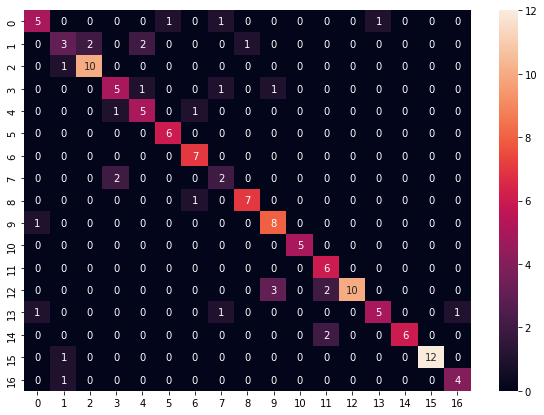




    precision    recall
0    0.625000  0.714286
1    0.375000  0.500000
2    0.909091  0.833333
3    0.625000  0.625000
4    0.714286  0.625000
5    1.000000  0.857143
6    1.000000  0.777778
7    0.500000  0.400000
8    0.875000  0.875000
9    0.888889  0.666667
10   1.000000  1.000000
11   1.000000  0.600000
12   0.666667  1.000000
13   0.625000  0.833333
14   0.750000  1.000000
15   0.923077  1.000000
16   0.800000  0.800000
-------------------------------------------------------

FOLD :  7


-------------------------------------------------------
Model 0 Score :  80.88235294117648
Model 1 Score :  71.32352941176471
Model 2 Score :  68.38235294117648
Model 3 Score :  66.17647058823529
Accuracy Percentage :  82.3529411764706


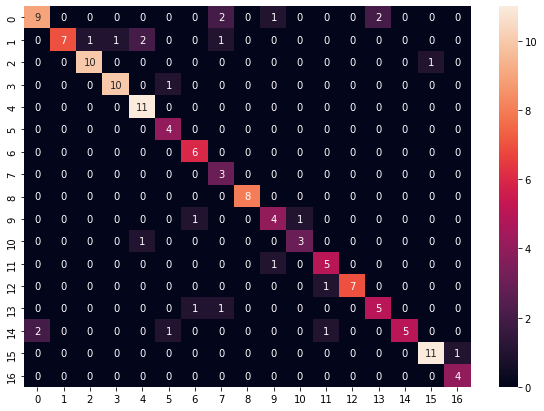




    precision    recall
0    0.642857  0.818182
1    0.583333  1.000000
2    0.909091  0.909091
3    0.909091  0.909091
4    1.000000  0.785714
5    1.000000  0.666667
6    1.000000  0.750000
7    1.000000  0.428571
8    1.000000  1.000000
9    0.666667  0.666667
10   0.750000  0.750000
11   0.833333  0.714286
12   0.875000  1.000000
13   0.714286  0.714286
14   0.555556  1.000000
15   0.916667  0.916667
16   1.000000  0.800000
-------------------------------------------------------

FOLD :  8


-------------------------------------------------------
Model 0 Score :  83.82352941176471
Model 1 Score :  79.41176470588235
Model 2 Score :  66.17647058823529
Model 3 Score :  63.23529411764706
Accuracy Percentage :  85.29411764705883


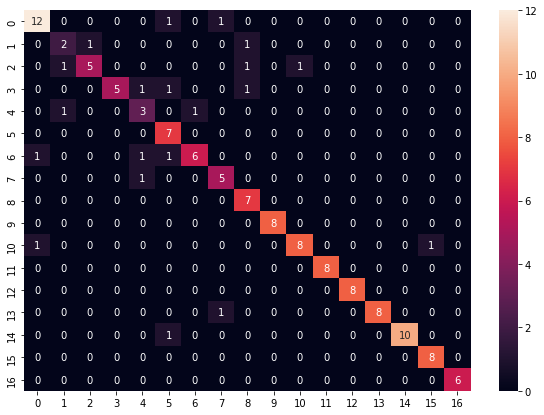




    precision    recall
0    0.857143  0.857143
1    0.500000  0.500000
2    0.625000  0.833333
3    0.625000  1.000000
4    0.600000  0.500000
5    1.000000  0.636364
6    0.666667  0.857143
7    0.833333  0.714286
8    1.000000  0.700000
9    1.000000  1.000000
10   0.800000  0.888889
11   1.000000  1.000000
12   1.000000  1.000000
13   0.888889  1.000000
14   0.909091  1.000000
15   1.000000  0.888889
16   1.000000  1.000000
-------------------------------------------------------

FOLD :  9


-------------------------------------------------------
Model 0 Score :  76.47058823529412
Model 1 Score :  69.11764705882352
Model 2 Score :  71.32352941176471
Model 3 Score :  61.029411764705884
Accuracy Percentage :  77.94117647058823


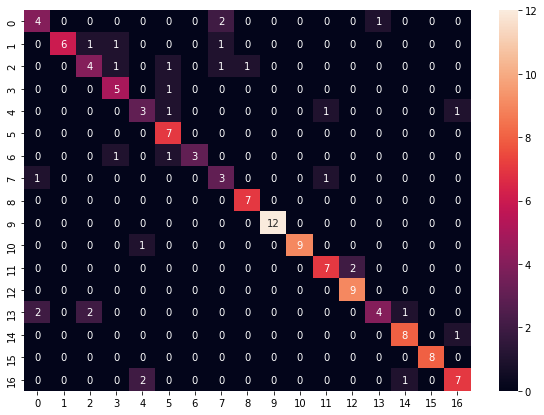




    precision    recall
0    0.571429  0.571429
1    0.666667  1.000000
2    0.500000  0.571429
3    0.833333  0.625000
4    0.500000  0.500000
5    1.000000  0.636364
6    0.600000  1.000000
7    0.600000  0.428571
8    1.000000  0.875000
9    1.000000  1.000000
10   0.900000  1.000000
11   0.777778  0.777778
12   1.000000  0.818182
13   0.444444  0.800000
14   0.888889  0.800000
15   1.000000  1.000000
16   0.700000  0.777778
-------------------------------------------------------

FOLD :  10


-------------------------------------------------------
Model 0 Score :  76.47058823529412
Model 1 Score :  69.85294117647058
Model 2 Score :  66.17647058823529
Model 3 Score :  56.61764705882353
Accuracy Percentage :  75.73529411764706


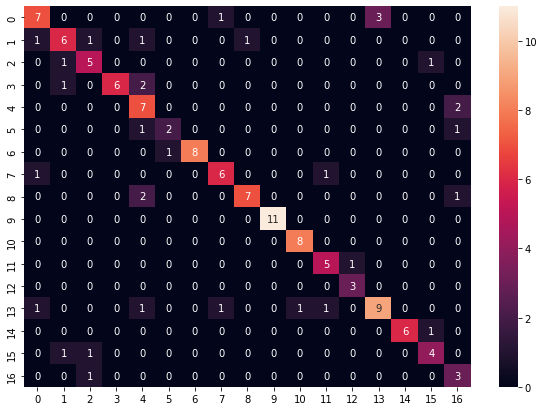




    precision    recall
0    0.636364  0.700000
1    0.600000  0.666667
2    0.714286  0.625000
3    0.666667  1.000000
4    0.777778  0.500000
5    0.500000  0.666667
6    0.888889  1.000000
7    0.750000  0.750000
8    0.700000  0.875000
9    1.000000  1.000000
10   1.000000  0.888889
11   0.833333  0.714286
12   1.000000  0.750000
13   0.642857  0.750000
14   0.857143  1.000000
15   0.666667  0.666667
16   0.750000  0.428571
-------------------------------------------------------
Average Accuracy :  80.07352941176471


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)




def KFold(images,labels):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = LogisticRegression()
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    print('\nFOLD : ', folditer)

    print('\n')

    print('-------------------------------------------------------')

    for i in range(len(models)):
      x_test = arr[i].iloc[test_index]
      print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    print('Accuracy Percentage : ', Accuracy)
    
    ConfusionMatrix(y_predicted,y_test)

    print('-------------------------------------------------------')

  
  print('Average Accuracy : ', avgAccuracy/10)




KFold(images.copy(),labels.copy())

# SLP with k-fold || k = 5 || k = 10 and without k-fold

SLP WITHOUT K-FOLD 

Model 0 Score :  79.41176470588235
Model 1 Score :  71.81372549019608
Model 2 Score :  62.745098039215684
Model 3 Score :  57.35294117647059
Accuracy Percentage :  79.65686274509804


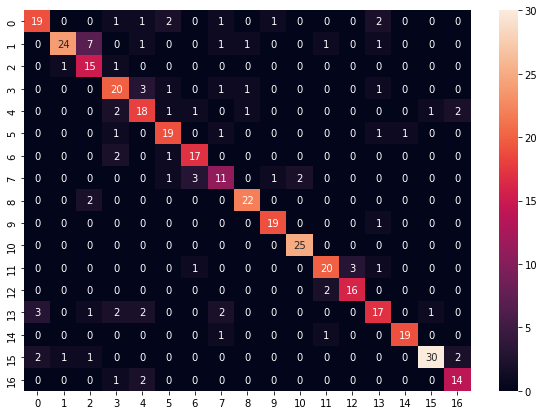




    precision    recall
0    0.703704  0.791667
1    0.666667  0.923077
2    0.882353  0.576923
3    0.740741  0.666667
4    0.692308  0.666667
5    0.826087  0.760000
6    0.850000  0.772727
7    0.611111  0.611111
8    0.916667  0.880000
9    0.950000  0.904762
10   1.000000  0.925926
11   0.800000  0.833333
12   0.888889  0.842105
13   0.607143  0.708333
14   0.904762  0.950000
15   0.833333  0.937500
16   0.823529  0.777778
[[3.6247352417252263, 3.267015792411328, 2.970423098030874, 2.779063267402929, 2.569119048601959, 2.4842891493914436, 2.389302398289555, 2.2815885564162324, 2.209464539895271, 2.185447575796452, 2.144620915385197, 2.1080760499482336, 2.039312047977994, 1.9944061133608566, 1.935583138055211, 1.9023277131090877, 1.8884742196072917, 1.849419659212264, 1.8335073777468827, 1.800067618532001, 1.7417795011769717, 1.7365972471717441, 1.7032451188283484, 1.7247198763421676, 1.6666841279416933, 1.6384404265812342, 1.6230110446914852, 1.6269950353111673, 1.5746811590228

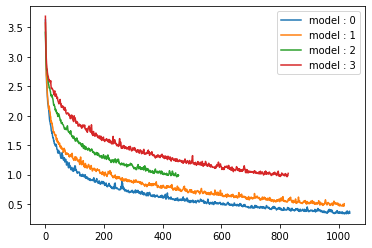

In [ ]:

models = []

x_train_index, x_test_index, y_train, y_test = train_test_split(images, labels, test_size=0.3)

for df in arr:
  x_train = df.iloc[x_train_index]
  model = MLPClassifier(hidden_layer_sizes=(),max_iter=1500,early_stopping=True,n_iter_no_change = 150)
  model.fit(x_train, y_train)
  models.append(model)

for i in range(len(models)):
  x_test = arr[i].iloc[x_test_index]
  print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

y_predicted = predictTheClass(x_test_index,y_test,models,arr)                        
Accuracy = findAccuracy(y_predicted,y_test)
print('Accuracy Percentage : ',Accuracy)
CM = ConfusionMatrix(y_predicted,y_test)

loss_values = [models[i].loss_curve_ for i in range(len(models))]
print(loss_values)

for i in range(len(loss_values)):
  plt.plot(loss_values[i],label='model : ' + str(i))

plt.legend()
plt.show()
# MLPClassifier(hidden_layer_sizes=(),max_iter=1500,early_stopping=True,n_iter_no_change = 150)

SLP WITH K-FOLD || K = 5


FOLD :  1


-------------------------------------------------------
Model 0 Score :  74.63235294117648
Model 1 Score :  75.73529411764706
Model 2 Score :  58.45588235294118
Model 3 Score :  56.98529411764706
Accuracy Percentage :  79.04411764705883


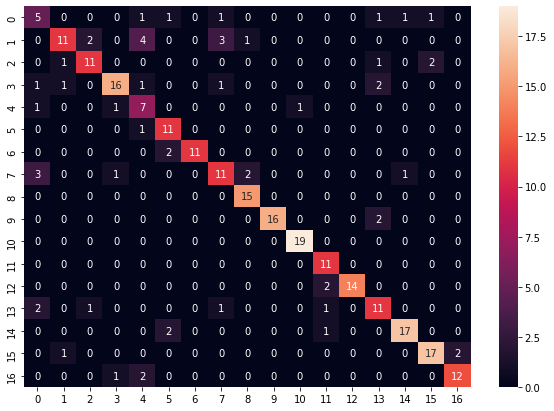




    precision    recall
0    0.454545  0.416667
1    0.523810  0.785714
2    0.733333  0.785714
3    0.727273  0.842105
4    0.700000  0.437500
5    0.916667  0.687500
6    0.846154  1.000000
7    0.611111  0.647059
8    1.000000  0.833333
9    0.888889  1.000000
10   1.000000  0.950000
11   1.000000  0.733333
12   0.875000  1.000000
13   0.687500  0.647059
14   0.850000  0.894737
15   0.850000  0.850000
16   0.800000  0.857143
-------------------------------------------------------

FOLD :  2


-------------------------------------------------------
Model 0 Score :  78.67647058823529
Model 1 Score :  73.16176470588235
Model 2 Score :  65.44117647058823
Model 3 Score :  67.27941176470588
Accuracy Percentage :  80.88235294117646


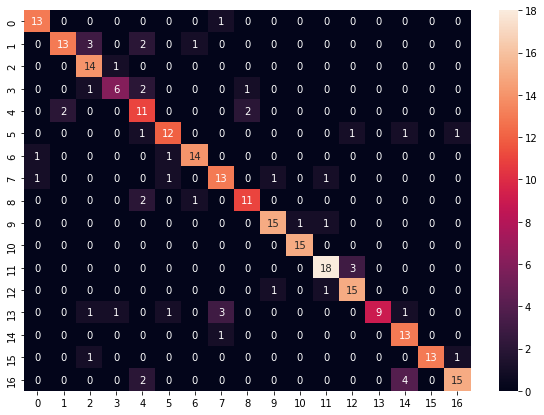




    precision    recall
0    0.928571  0.866667
1    0.684211  0.866667
2    0.933333  0.700000
3    0.600000  0.750000
4    0.733333  0.550000
5    0.750000  0.800000
6    0.875000  0.875000
7    0.764706  0.722222
8    0.785714  0.785714
9    0.882353  0.882353
10   1.000000  0.937500
11   0.857143  0.857143
12   0.882353  0.789474
13   0.562500  1.000000
14   0.928571  0.684211
15   0.866667  1.000000
16   0.714286  0.882353
-------------------------------------------------------

FOLD :  3


-------------------------------------------------------
Model 0 Score :  72.05882352941177
Model 1 Score :  66.54411764705883
Model 2 Score :  68.38235294117648
Model 3 Score :  57.35294117647059
Accuracy Percentage :  75.0


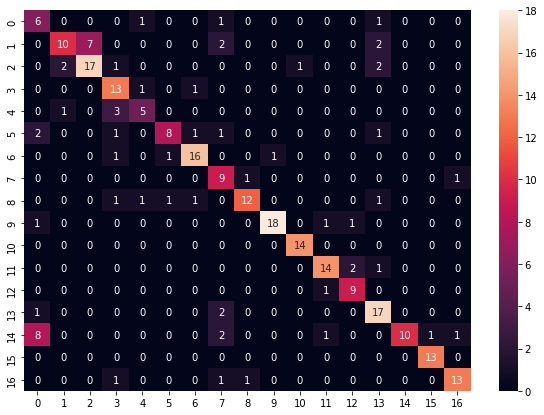




    precision    recall
0    0.666667  0.333333
1    0.476190  0.769231
2    0.739130  0.708333
3    0.866667  0.619048
4    0.555556  0.625000
5    0.571429  0.800000
6    0.842105  0.842105
7    0.818182  0.500000
8    0.705882  0.857143
9    0.857143  0.947368
10   1.000000  0.933333
11   0.823529  0.823529
12   0.900000  0.750000
13   0.850000  0.680000
14   0.434783  1.000000
15   1.000000  0.928571
16   0.812500  0.866667
-------------------------------------------------------

FOLD :  4


-------------------------------------------------------
Model 0 Score :  74.26470588235294
Model 1 Score :  62.13235294117647
Model 2 Score :  62.5
Model 3 Score :  47.42647058823529
Accuracy Percentage :  72.05882352941177


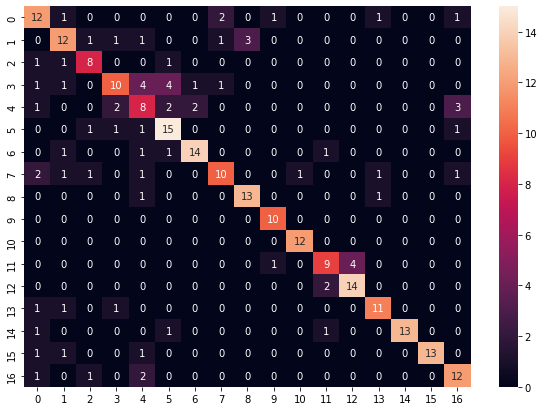




    precision    recall
0    0.666667  0.571429
1    0.631579  0.631579
2    0.727273  0.666667
3    0.454545  0.666667
4    0.444444  0.400000
5    0.789474  0.625000
6    0.777778  0.823529
7    0.555556  0.714286
8    0.866667  0.812500
9    1.000000  0.833333
10   1.000000  0.923077
11   0.642857  0.692308
12   0.875000  0.777778
13   0.785714  0.785714
14   0.812500  1.000000
15   0.812500  1.000000
16   0.750000  0.666667
-------------------------------------------------------

FOLD :  5


-------------------------------------------------------
Model 0 Score :  81.61764705882352
Model 1 Score :  70.22058823529412
Model 2 Score :  71.69117647058823
Model 3 Score :  65.80882352941177
Accuracy Percentage :  82.3529411764706


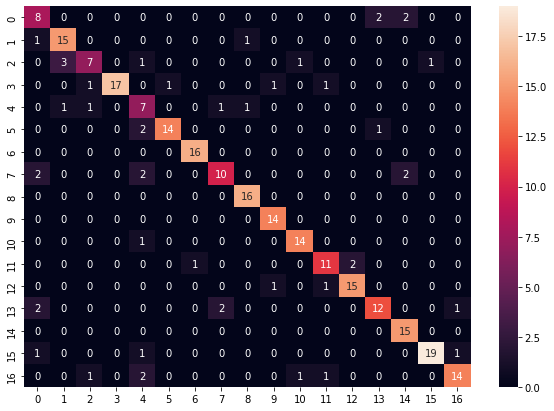




    precision    recall
0    0.666667  0.571429
1    0.882353  0.789474
2    0.538462  0.700000
3    0.809524  1.000000
4    0.636364  0.437500
5    0.823529  0.933333
6    1.000000  0.941176
7    0.625000  0.769231
8    1.000000  0.888889
9    1.000000  0.875000
10   0.933333  0.875000
11   0.785714  0.785714
12   0.882353  0.882353
13   0.705882  0.800000
14   1.000000  0.789474
15   0.863636  0.950000
16   0.736842  0.875000
-------------------------------------------------------
Average Accuracy :  77.86764705882354


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)




def KFold(images,labels):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = MLPClassifier(hidden_layer_sizes=(),max_iter=1500,early_stopping=True,n_iter_no_change = 150)
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    print('\nFOLD : ', folditer)

    print('\n')

    print('-------------------------------------------------------')

    for i in range(len(models)):
      x_test = arr[i].iloc[test_index]
      print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    print('Accuracy Percentage : ', Accuracy)
    
    ConfusionMatrix(y_predicted,y_test)

    print('-------------------------------------------------------')

  
  print('Average Accuracy : ', avgAccuracy/5)




KFold(images.copy(),labels.copy())


FOLD :  1


-------------------------------------------------------
Model 0 Score :  80.88235294117648
Model 1 Score :  70.58823529411765
Model 2 Score :  61.029411764705884
Model 3 Score :  55.14705882352941
Accuracy Percentage :  79.41176470588235


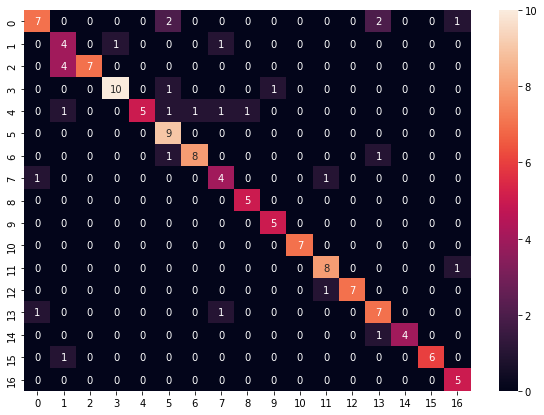




    precision    recall
0    0.583333  0.777778
1    0.666667  0.400000
2    0.636364  1.000000
3    0.833333  0.909091
4    0.500000  1.000000
5    1.000000  0.642857
6    0.800000  0.888889
7    0.666667  0.571429
8    1.000000  0.833333
9    1.000000  0.833333
10   1.000000  1.000000
11   0.888889  0.800000
12   0.875000  1.000000
13   0.777778  0.636364
14   0.800000  1.000000
15   0.857143  1.000000
16   1.000000  0.714286
-------------------------------------------------------

FOLD :  2


-------------------------------------------------------
Model 0 Score :  78.67647058823529
Model 1 Score :  72.05882352941177
Model 2 Score :  61.76470588235294
Model 3 Score :  62.5
Accuracy Percentage :  80.88235294117646


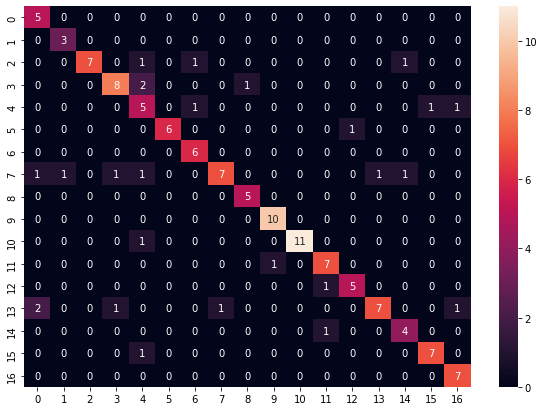




    precision    recall
0    1.000000  0.625000
1    1.000000  0.750000
2    0.700000  1.000000
3    0.727273  0.800000
4    0.625000  0.454545
5    0.857143  1.000000
6    1.000000  0.750000
7    0.538462  0.875000
8    1.000000  0.833333
9    1.000000  0.909091
10   0.916667  1.000000
11   0.875000  0.777778
12   0.833333  0.833333
13   0.583333  0.875000
14   0.800000  0.666667
15   0.875000  0.875000
16   1.000000  0.777778
-------------------------------------------------------

FOLD :  3


-------------------------------------------------------
Model 0 Score :  77.20588235294117
Model 1 Score :  73.52941176470588
Model 2 Score :  73.52941176470588
Model 3 Score :  55.88235294117647
Accuracy Percentage :  80.1470588235294


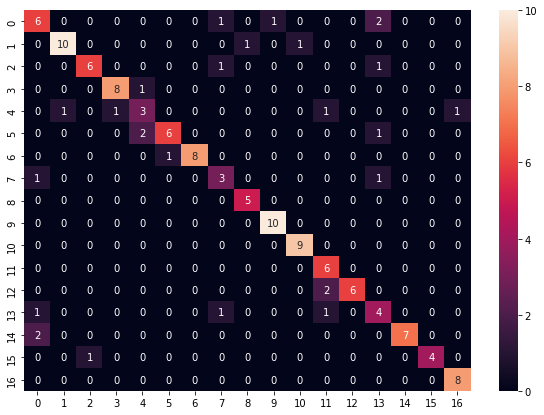




    precision    recall
0    0.600000  0.600000
1    0.833333  0.909091
2    0.750000  0.857143
3    0.888889  0.888889
4    0.428571  0.500000
5    0.666667  0.857143
6    0.888889  1.000000
7    0.600000  0.500000
8    1.000000  0.833333
9    1.000000  0.909091
10   1.000000  0.900000
11   1.000000  0.600000
12   0.750000  1.000000
13   0.571429  0.444444
14   0.777778  1.000000
15   0.800000  1.000000
16   1.000000  0.888889
-------------------------------------------------------

FOLD :  4


-------------------------------------------------------
Model 0 Score :  86.02941176470588
Model 1 Score :  78.67647058823529
Model 2 Score :  80.14705882352942
Model 3 Score :  67.64705882352942
Accuracy Percentage :  88.23529411764706


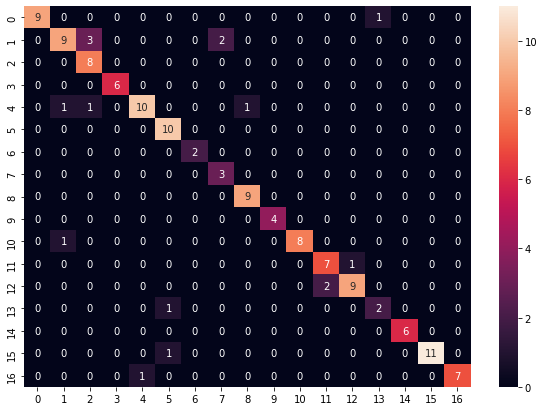




    precision    recall
0    0.900000  1.000000
1    0.642857  0.818182
2    1.000000  0.666667
3    1.000000  1.000000
4    0.769231  0.909091
5    1.000000  0.833333
6    1.000000  1.000000
7    1.000000  0.600000
8    1.000000  0.900000
9    1.000000  1.000000
10   0.888889  1.000000
11   0.875000  0.777778
12   0.818182  0.900000
13   0.666667  0.666667
14   1.000000  1.000000
15   0.916667  1.000000
16   0.875000  1.000000
-------------------------------------------------------

FOLD :  5


-------------------------------------------------------
Model 0 Score :  74.26470588235294
Model 1 Score :  73.52941176470588
Model 2 Score :  63.970588235294116
Model 3 Score :  57.35294117647059
Accuracy Percentage :  77.20588235294117


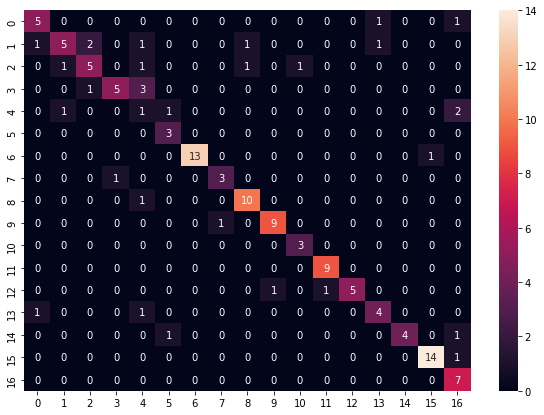




    precision    recall
0    0.714286  0.714286
1    0.454545  0.714286
2    0.555556  0.625000
3    0.555556  0.833333
4    0.200000  0.125000
5    1.000000  0.600000
6    0.928571  1.000000
7    0.750000  0.750000
8    0.909091  0.833333
9    0.900000  0.900000
10   1.000000  0.750000
11   1.000000  0.900000
12   0.714286  1.000000
13   0.666667  0.666667
14   0.666667  1.000000
15   0.933333  0.933333
16   1.000000  0.583333
-------------------------------------------------------

FOLD :  6


-------------------------------------------------------
Model 0 Score :  77.20588235294117
Model 1 Score :  75.0
Model 2 Score :  67.64705882352942
Model 3 Score :  46.32352941176471
Accuracy Percentage :  78.67647058823529


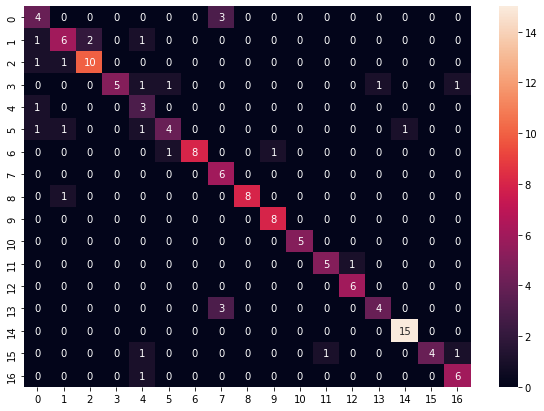




    precision    recall
0    0.571429  0.500000
1    0.600000  0.666667
2    0.833333  0.833333
3    0.555556  1.000000
4    0.750000  0.375000
5    0.500000  0.666667
6    0.800000  1.000000
7    1.000000  0.500000
8    0.888889  1.000000
9    1.000000  0.888889
10   1.000000  1.000000
11   0.833333  0.833333
12   1.000000  0.857143
13   0.571429  0.800000
14   1.000000  0.937500
15   0.571429  1.000000
16   0.857143  0.750000
-------------------------------------------------------

FOLD :  7


-------------------------------------------------------
Model 0 Score :  77.20588235294117
Model 1 Score :  72.79411764705883
Model 2 Score :  58.08823529411765
Model 3 Score :  64.70588235294117
Accuracy Percentage :  77.94117647058823


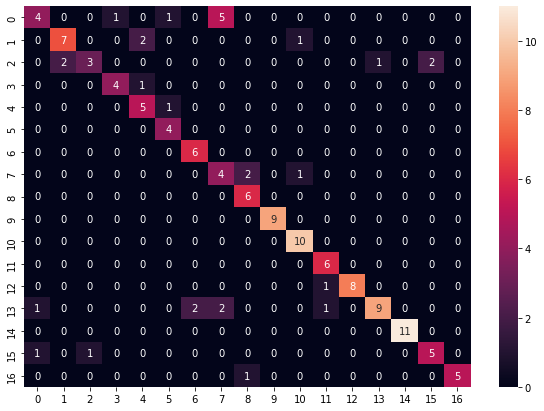




    precision    recall
0    0.363636  0.666667
1    0.700000  0.777778
2    0.375000  0.750000
3    0.800000  0.800000
4    0.833333  0.625000
5    1.000000  0.666667
6    1.000000  0.750000
7    0.571429  0.363636
8    1.000000  0.666667
9    1.000000  1.000000
10   1.000000  0.833333
11   1.000000  0.750000
12   0.888889  1.000000
13   0.600000  0.900000
14   1.000000  1.000000
15   0.714286  0.714286
16   0.833333  1.000000
-------------------------------------------------------

FOLD :  8


-------------------------------------------------------
Model 0 Score :  70.58823529411765
Model 1 Score :  71.32352941176471
Model 2 Score :  66.91176470588235
Model 3 Score :  58.08823529411765
Accuracy Percentage :  72.05882352941177


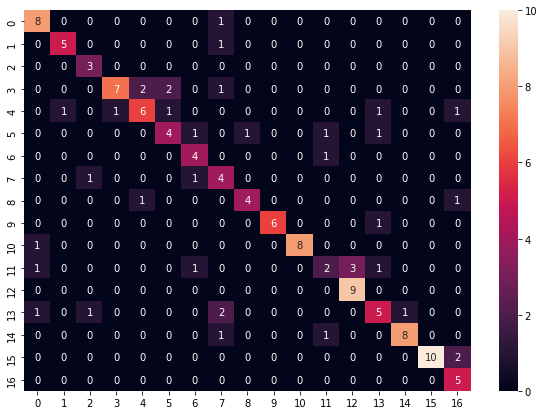




    precision    recall
0    0.888889  0.727273
1    0.833333  0.833333
2    1.000000  0.600000
3    0.583333  0.875000
4    0.545455  0.666667
5    0.500000  0.571429
6    0.800000  0.571429
7    0.666667  0.400000
8    0.666667  0.800000
9    0.857143  1.000000
10   0.888889  1.000000
11   0.250000  0.400000
12   1.000000  0.750000
13   0.500000  0.555556
14   0.800000  0.888889
15   0.833333  1.000000
16   1.000000  0.555556
-------------------------------------------------------

FOLD :  9


-------------------------------------------------------
Model 0 Score :  74.26470588235294
Model 1 Score :  72.05882352941177
Model 2 Score :  61.76470588235294
Model 3 Score :  58.82352941176471
Accuracy Percentage :  75.0


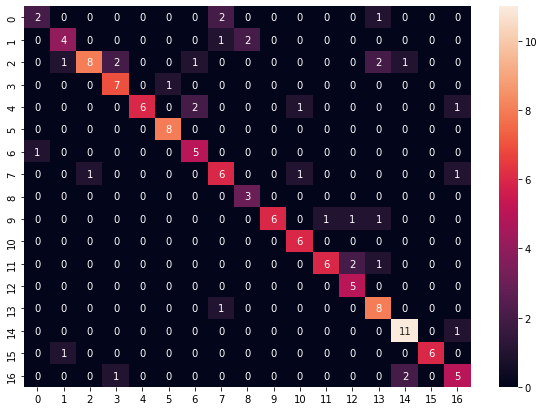




    precision    recall
0    0.400000  0.666667
1    0.571429  0.666667
2    0.533333  0.888889
3    0.875000  0.700000
4    0.600000  1.000000
5    1.000000  0.888889
6    0.833333  0.625000
7    0.666667  0.600000
8    1.000000  0.600000
9    0.666667  1.000000
10   1.000000  0.750000
11   0.666667  0.857143
12   1.000000  0.625000
13   0.888889  0.615385
14   0.916667  0.785714
15   0.857143  1.000000
16   0.625000  0.625000
-------------------------------------------------------

FOLD :  10


-------------------------------------------------------
Model 0 Score :  80.88235294117648
Model 1 Score :  69.11764705882352
Model 2 Score :  66.17647058823529
Model 3 Score :  66.17647058823529
Accuracy Percentage :  80.1470588235294


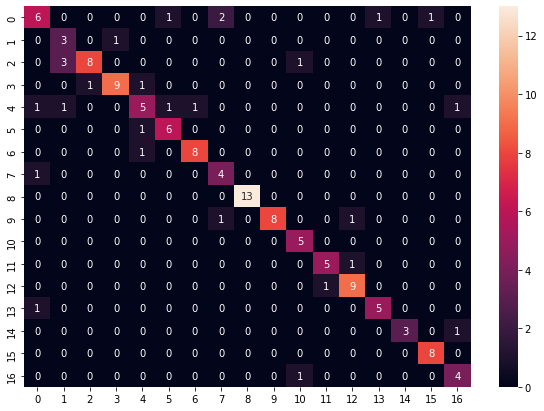




    precision    recall
0    0.545455  0.666667
1    0.750000  0.428571
2    0.666667  0.888889
3    0.818182  0.900000
4    0.500000  0.625000
5    0.857143  0.750000
6    0.888889  0.888889
7    0.800000  0.571429
8    1.000000  1.000000
9    0.800000  1.000000
10   1.000000  0.714286
11   0.833333  0.833333
12   0.900000  0.818182
13   0.833333  0.833333
14   0.750000  1.000000
15   1.000000  0.888889
16   0.800000  0.666667
-------------------------------------------------------
Average Accuracy :  78.97058823529412


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)




def KFold(images,labels):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = MLPClassifier(hidden_layer_sizes=(),max_iter=1500,early_stopping=True,n_iter_no_change = 150)
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    print('\nFOLD : ', folditer)

    print('\n')

    print('-------------------------------------------------------')

    for i in range(len(models)):
      x_test = arr[i].iloc[test_index]
      print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    print('Accuracy Percentage : ', Accuracy)
    
    ConfusionMatrix(y_predicted,y_test)

    print('-------------------------------------------------------')

  
  print('Average Accuracy : ', avgAccuracy/10)




KFold(images.copy(),labels.copy())

# Perceptron Learning Algorithm ( PLA ) || k-fold || k = 5 || k = 10


FOLD :  1


-------------------------------------------------------
Model 0 Score :  59.55882352941176
Model 1 Score :  56.98529411764706
Model 2 Score :  66.17647058823529
Model 3 Score :  47.42647058823529
Accuracy Percentage :  68.38235294117646


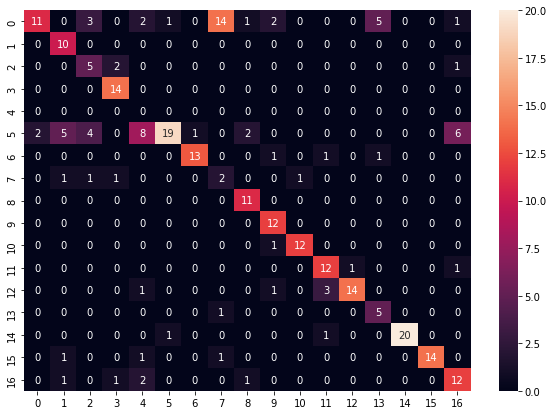




    precision    recall
0    0.275000  0.846154
1    1.000000  0.555556
2    0.625000  0.384615
3    1.000000  0.777778
4         NaN  0.000000
5    0.404255  0.904762
6    0.812500  0.928571
7    0.333333  0.111111
8    1.000000  0.733333
9    1.000000  0.705882
10   0.923077  0.923077
11   0.857143  0.705882
12   0.736842  0.933333
13   0.833333  0.454545
14   0.909091  1.000000
15   0.823529  1.000000
16   0.705882  0.571429
-------------------------------------------------------

FOLD :  2


-------------------------------------------------------
Model 0 Score :  64.33823529411765
Model 1 Score :  51.10294117647059
Model 2 Score :  60.29411764705882
Model 3 Score :  19.852941176470587
Accuracy Percentage :  64.70588235294117


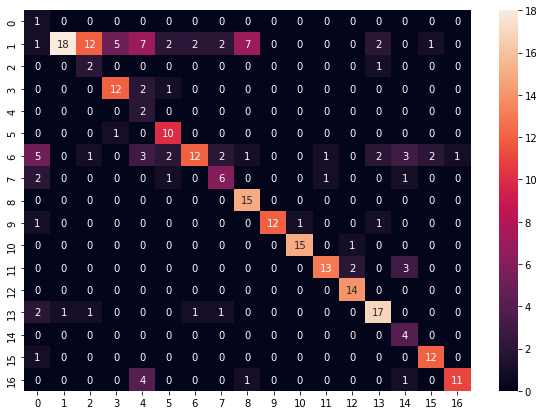




    precision    recall
0    1.000000  0.076923
1    0.305085  0.947368
2    0.666667  0.125000
3    0.800000  0.666667
4    1.000000  0.111111
5    0.909091  0.625000
6    0.342857  0.800000
7    0.545455  0.545455
8    1.000000  0.625000
9    0.800000  1.000000
10   0.937500  0.937500
11   0.722222  0.866667
12   1.000000  0.823529
13   0.739130  0.739130
14   1.000000  0.333333
15   0.923077  0.800000
16   0.647059  0.916667
-------------------------------------------------------

FOLD :  3


-------------------------------------------------------
Model 0 Score :  75.0
Model 1 Score :  72.42647058823529
Model 2 Score :  61.39705882352941
Model 3 Score :  26.838235294117645
Accuracy Percentage :  75.36764705882354


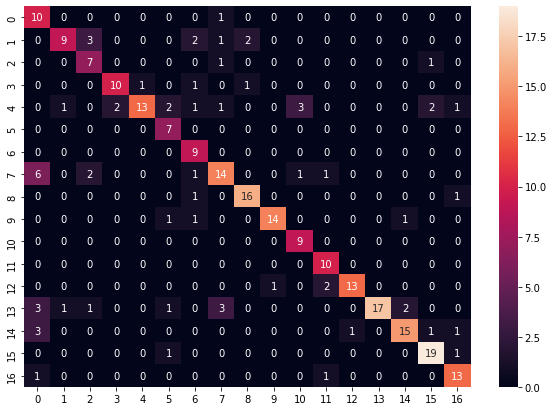




    precision    recall
0    0.909091  0.434783
1    0.529412  0.818182
2    0.777778  0.538462
3    0.769231  0.833333
4    0.500000  0.928571
5    1.000000  0.583333
6    1.000000  0.562500
7    0.560000  0.666667
8    0.888889  0.842105
9    0.823529  0.933333
10   1.000000  0.692308
11   1.000000  0.714286
12   0.812500  0.928571
13   0.607143  1.000000
14   0.714286  0.833333
15   0.904762  0.826087
16   0.866667  0.764706
-------------------------------------------------------

FOLD :  4


-------------------------------------------------------
Model 0 Score :  76.83823529411765
Model 1 Score :  61.76470588235294
Model 2 Score :  61.39705882352941
Model 3 Score :  39.705882352941174
Accuracy Percentage :  81.61764705882354


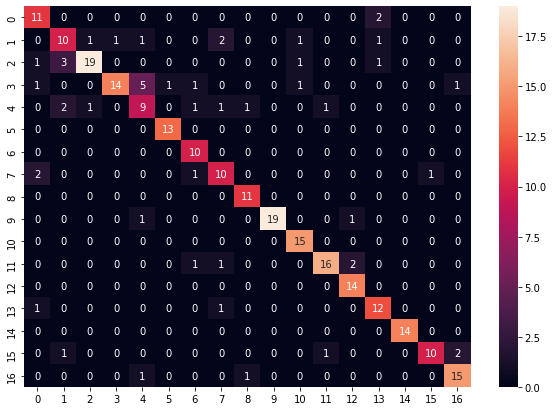




    precision    recall
0    0.846154  0.687500
1    0.588235  0.625000
2    0.760000  0.904762
3    0.583333  0.933333
4    0.562500  0.529412
5    1.000000  0.928571
6    1.000000  0.714286
7    0.714286  0.666667
8    1.000000  0.846154
9    0.904762  1.000000
10   1.000000  0.833333
11   0.800000  0.888889
12   1.000000  0.823529
13   0.857143  0.750000
14   1.000000  1.000000
15   0.714286  0.909091
16   0.882353  0.833333
-------------------------------------------------------

FOLD :  5


-------------------------------------------------------
Model 0 Score :  66.17647058823529
Model 1 Score :  55.14705882352941
Model 2 Score :  63.970588235294116
Model 3 Score :  43.38235294117647
Accuracy Percentage :  68.38235294117646


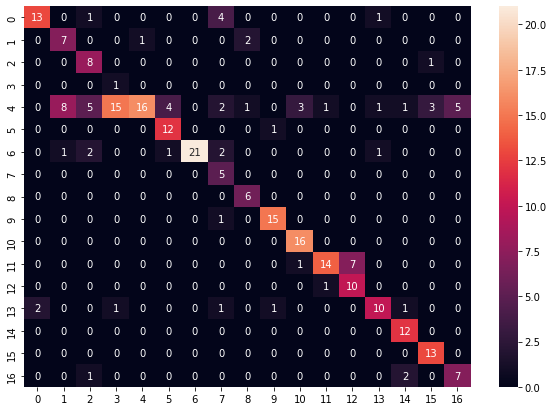




    precision    recall
0    0.684211  0.866667
1    0.700000  0.437500
2    0.888889  0.470588
3    1.000000  0.058824
4    0.246154  0.941176
5    0.923077  0.705882
6    0.750000  1.000000
7    1.000000  0.333333
8    1.000000  0.666667
9    0.937500  0.882353
10   1.000000  0.800000
11   0.636364  0.875000
12   0.909091  0.588235
13   0.625000  0.769231
14   1.000000  0.750000
15   1.000000  0.764706
16   0.700000  0.583333
-------------------------------------------------------
Average Accuracy :  71.69117647058823


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)




def KFold(images,labels):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = Perceptron(max_iter=1500,early_stopping=True,n_iter_no_change = 150,validation_fraction=0.1)
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    print('\nFOLD : ', folditer)

    print('\n')

    print('-------------------------------------------------------')

    for i in range(len(models)):
      x_test = arr[i].iloc[test_index]
      print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    print('Accuracy Percentage : ', Accuracy)
    
    ConfusionMatrix(y_predicted,y_test)

    print('-------------------------------------------------------')

  
  print('Average Accuracy : ', avgAccuracy/5)




KFold(images.copy(),labels.copy())


FOLD :  1


-------------------------------------------------------
Model 0 Score :  60.29411764705882
Model 1 Score :  48.529411764705884
Model 2 Score :  59.55882352941176
Model 3 Score :  39.705882352941174
Accuracy Percentage :  59.55882352941177


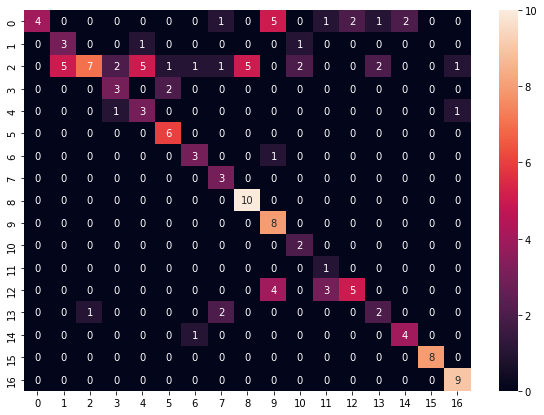




    precision    recall
0    0.250000  1.000000
1    0.600000  0.375000
2    0.218750  0.875000
3    0.600000  0.500000
4    0.600000  0.333333
5    1.000000  0.666667
6    0.750000  0.600000
7    1.000000  0.428571
8    1.000000  0.666667
9    1.000000  0.444444
10   1.000000  0.400000
11   1.000000  0.200000
12   0.416667  0.714286
13   0.400000  0.400000
14   0.800000  0.666667
15   1.000000  1.000000
16   1.000000  0.818182
-------------------------------------------------------

FOLD :  2


-------------------------------------------------------
Model 0 Score :  63.970588235294116
Model 1 Score :  61.029411764705884
Model 2 Score :  62.5
Model 3 Score :  34.55882352941176
Accuracy Percentage :  72.79411764705883


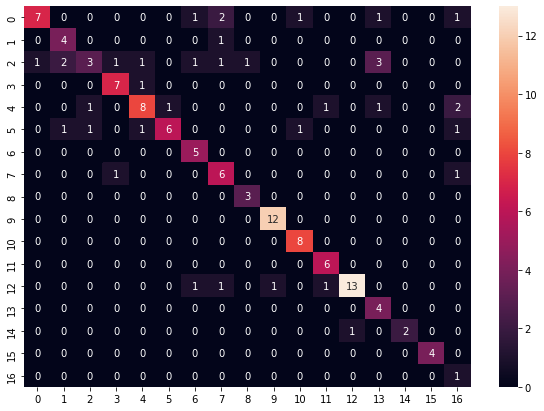




    precision    recall
0    0.538462  0.875000
1    0.800000  0.571429
2    0.214286  0.600000
3    0.875000  0.777778
4    0.571429  0.727273
5    0.545455  0.857143
6    1.000000  0.625000
7    0.750000  0.545455
8    1.000000  0.750000
9    1.000000  0.923077
10   1.000000  0.800000
11   1.000000  0.750000
12   0.764706  0.928571
13   1.000000  0.444444
14   0.666667  1.000000
15   1.000000  1.000000
16   1.000000  0.166667
-------------------------------------------------------

FOLD :  3


-------------------------------------------------------
Model 0 Score :  72.05882352941177
Model 1 Score :  61.029411764705884
Model 2 Score :  52.20588235294118
Model 3 Score :  56.61764705882353
Accuracy Percentage :  79.41176470588235


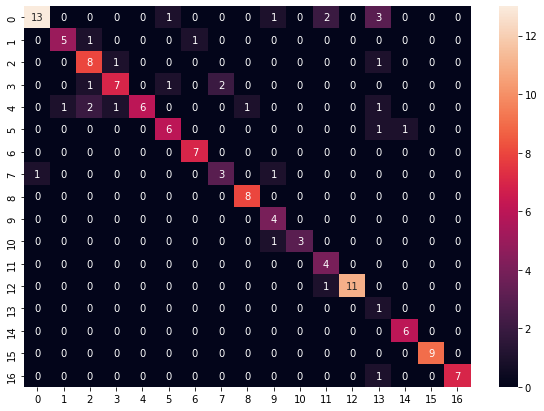




    precision    recall
0    0.650000  0.928571
1    0.714286  0.833333
2    0.800000  0.666667
3    0.636364  0.777778
4    0.500000  1.000000
5    0.750000  0.750000
6    1.000000  0.875000
7    0.600000  0.600000
8    1.000000  0.888889
9    1.000000  0.571429
10   0.750000  1.000000
11   1.000000  0.571429
12   0.916667  1.000000
13   1.000000  0.125000
14   1.000000  0.857143
15   1.000000  1.000000
16   0.875000  1.000000
-------------------------------------------------------

FOLD :  4


-------------------------------------------------------
Model 0 Score :  73.52941176470588
Model 1 Score :  62.5
Model 2 Score :  65.44117647058823
Model 3 Score :  61.76470588235294
Accuracy Percentage :  79.41176470588235


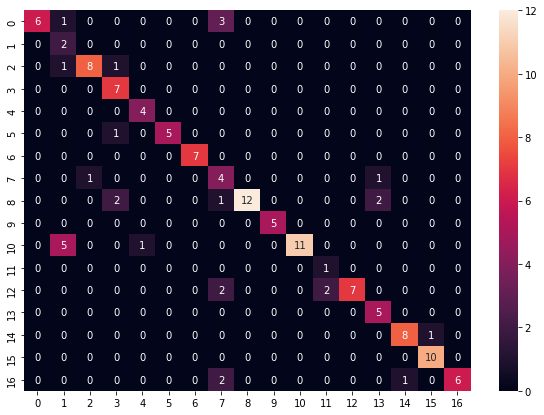




    precision    recall
0    0.600000  1.000000
1    1.000000  0.222222
2    0.800000  0.888889
3    1.000000  0.636364
4    1.000000  0.800000
5    0.833333  1.000000
6    1.000000  1.000000
7    0.666667  0.333333
8    0.705882  1.000000
9    1.000000  1.000000
10   0.647059  1.000000
11   1.000000  0.333333
12   0.636364  1.000000
13   1.000000  0.625000
14   0.888889  0.888889
15   1.000000  0.909091
16   0.666667  1.000000
-------------------------------------------------------

FOLD :  5


-------------------------------------------------------
Model 0 Score :  64.70588235294117
Model 1 Score :  52.94117647058824
Model 2 Score :  46.32352941176471
Model 3 Score :  42.64705882352941
Accuracy Percentage :  69.8529411764706


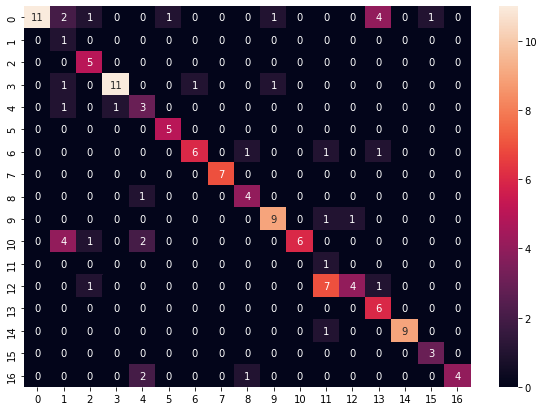




    precision    recall
0    0.523810  1.000000
1    1.000000  0.111111
2    1.000000  0.625000
3    0.785714  0.916667
4    0.600000  0.375000
5    1.000000  0.833333
6    0.666667  0.857143
7    1.000000  1.000000
8    0.800000  0.666667
9    0.818182  0.818182
10   0.461538  1.000000
11   1.000000  0.090909
12   0.307692  0.800000
13   1.000000  0.500000
14   0.900000  1.000000
15   1.000000  0.750000
16   0.571429  1.000000
-------------------------------------------------------

FOLD :  6


-------------------------------------------------------
Model 0 Score :  58.82352941176471
Model 1 Score :  50.0
Model 2 Score :  54.41176470588235
Model 3 Score :  55.88235294117647
Accuracy Percentage :  62.5


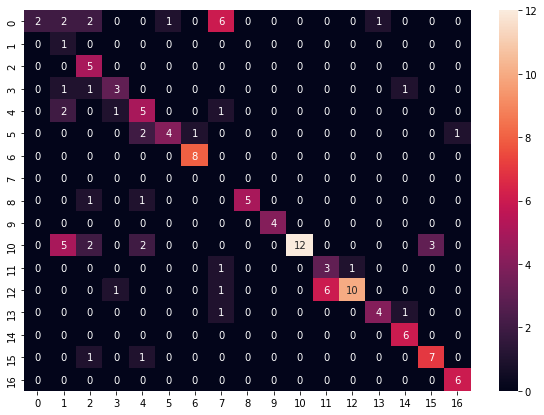




    precision    recall
0    0.142857  1.000000
1    1.000000  0.090909
2    1.000000  0.416667
3    0.500000  0.600000
4    0.555556  0.454545
5    0.500000  0.800000
6    1.000000  0.888889
7         NaN  0.000000
8    0.714286  1.000000
9    1.000000  1.000000
10   0.500000  1.000000
11   0.600000  0.333333
12   0.555556  0.909091
13   0.666667  0.800000
14   1.000000  0.750000
15   0.777778  0.700000
16   1.000000  0.857143
-------------------------------------------------------

FOLD :  7


-------------------------------------------------------
Model 0 Score :  73.52941176470588
Model 1 Score :  62.5
Model 2 Score :  55.14705882352941
Model 3 Score :  39.705882352941174
Accuracy Percentage :  72.79411764705883


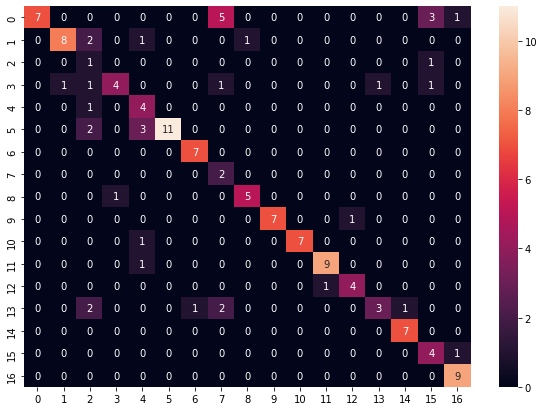




    precision    recall
0    0.437500  1.000000
1    0.666667  0.888889
2    0.500000  0.111111
3    0.444444  0.800000
4    0.800000  0.400000
5    0.687500  1.000000
6    1.000000  0.875000
7    1.000000  0.200000
8    0.833333  0.833333
9    0.875000  1.000000
10   0.875000  1.000000
11   0.900000  0.900000
12   0.800000  0.800000
13   0.333333  0.750000
14   1.000000  0.875000
15   0.800000  0.444444
16   1.000000  0.818182
-------------------------------------------------------

FOLD :  8


-------------------------------------------------------
Model 0 Score :  63.970588235294116
Model 1 Score :  61.029411764705884
Model 2 Score :  60.29411764705882
Model 3 Score :  56.61764705882353
Accuracy Percentage :  70.58823529411765


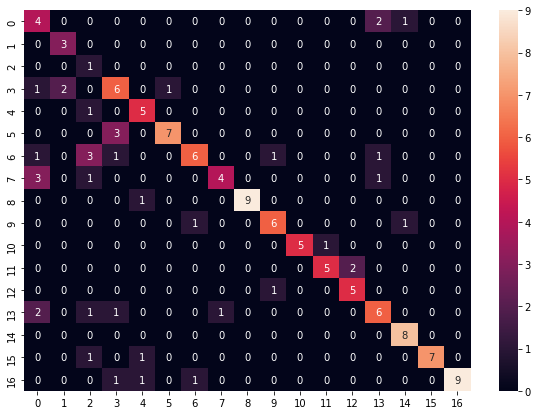




    precision    recall
0    0.571429  0.363636
1    1.000000  0.600000
2    1.000000  0.125000
3    0.600000  0.500000
4    0.833333  0.625000
5    0.700000  0.875000
6    0.461538  0.750000
7    0.444444  0.800000
8    0.900000  1.000000
9    0.750000  0.750000
10   0.833333  1.000000
11   0.714286  0.833333
12   0.833333  0.714286
13   0.545455  0.600000
14   1.000000  0.800000
15   0.777778  1.000000
16   0.750000  1.000000
-------------------------------------------------------

FOLD :  9


-------------------------------------------------------
Model 0 Score :  55.88235294117647
Model 1 Score :  58.08823529411765
Model 2 Score :  59.55882352941176
Model 3 Score :  45.588235294117645
Accuracy Percentage :  64.70588235294117


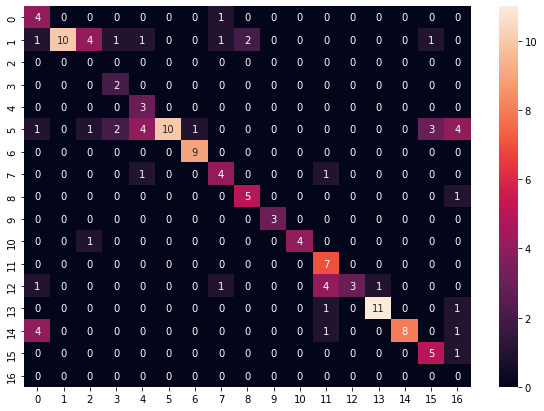




    precision    recall
0    0.800000  0.363636
1    0.476190  1.000000
2         NaN  0.000000
3    1.000000  0.400000
4    1.000000  0.333333
5    0.384615  1.000000
6    1.000000  0.900000
7    0.666667  0.571429
8    0.833333  0.714286
9    1.000000  1.000000
10   0.800000  1.000000
11   1.000000  0.500000
12   0.300000  1.000000
13   0.846154  0.916667
14   0.571429  1.000000
15   0.833333  0.555556
16        NaN  0.000000
-------------------------------------------------------

FOLD :  10


-------------------------------------------------------
Model 0 Score :  70.58823529411765
Model 1 Score :  72.05882352941177
Model 2 Score :  62.5
Model 3 Score :  43.38235294117647
Accuracy Percentage :  72.79411764705883


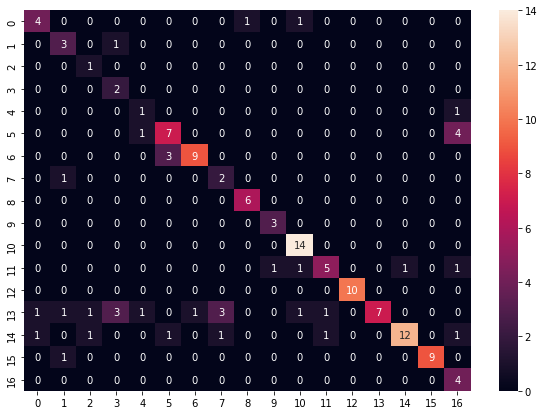




    precision    recall
0    0.666667  0.666667
1    0.750000  0.500000
2    1.000000  0.333333
3    1.000000  0.333333
4    0.500000  0.333333
5    0.583333  0.636364
6    0.750000  0.900000
7    0.666667  0.333333
8    1.000000  0.857143
9    1.000000  0.750000
10   1.000000  0.823529
11   0.555556  0.714286
12   1.000000  1.000000
13   0.350000  1.000000
14   0.666667  0.923077
15   0.900000  1.000000
16   1.000000  0.363636
-------------------------------------------------------
Average Accuracy :  70.44117647058825


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)




def KFold(images,labels):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = Perceptron(max_iter=1500,early_stopping=True,n_iter_no_change = 150,validation_fraction=0.1)
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    print('\nFOLD : ', folditer)

    print('\n')

    print('-------------------------------------------------------')

    for i in range(len(models)):
      x_test = arr[i].iloc[test_index]
      print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    print('Accuracy Percentage : ', Accuracy)
    
    ConfusionMatrix(y_predicted,y_test)

    print('-------------------------------------------------------')

  
  print('Average Accuracy : ', avgAccuracy/10)




KFold(images.copy(),labels.copy())

# MLP || k-fold || k = 5 || k = 10


FOLD :  1


-------------------------------------------------------
Model 0 Score :  66.91176470588235
Model 1 Score :  59.92647058823529
Model 2 Score :  66.54411764705883
Model 3 Score :  52.57352941176471
Accuracy Percentage :  70.22058823529412


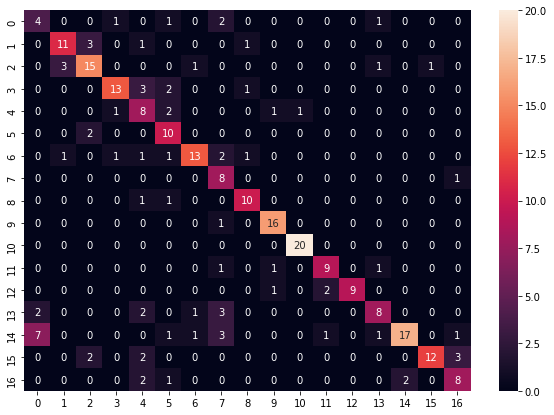




    precision    recall
0    0.444444  0.307692
1    0.687500  0.733333
2    0.714286  0.681818
3    0.684211  0.812500
4    0.615385  0.400000
5    0.833333  0.526316
6    0.650000  0.812500
7    0.888889  0.400000
8    0.833333  0.769231
9    0.941176  0.842105
10   1.000000  0.952381
11   0.750000  0.750000
12   0.750000  1.000000
13   0.500000  0.666667
14   0.531250  0.894737
15   0.631579  0.923077
16   0.615385  0.615385
-------------------------------------------------------

FOLD :  2


-------------------------------------------------------
Model 0 Score :  72.79411764705883
Model 1 Score :  65.07352941176471
Model 2 Score :  55.14705882352941
Model 3 Score :  48.161764705882355
Accuracy Percentage :  74.26470588235294


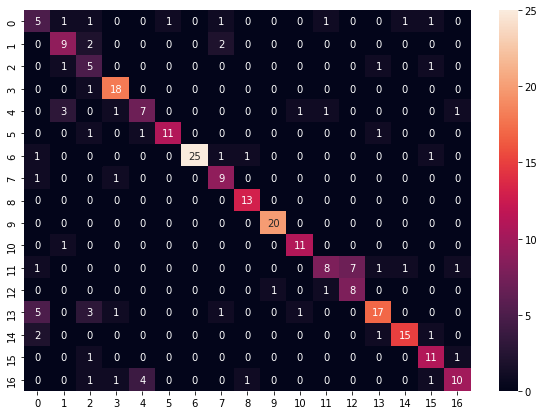




    precision    recall
0    0.416667  0.333333
1    0.692308  0.600000
2    0.625000  0.333333
3    0.947368  0.818182
4    0.500000  0.583333
5    0.785714  0.916667
6    0.862069  1.000000
7    0.818182  0.642857
8    1.000000  0.866667
9    1.000000  0.952381
10   0.916667  0.846154
11   0.421053  0.727273
12   0.800000  0.533333
13   0.607143  0.809524
14   0.789474  0.882353
15   0.846154  0.687500
16   0.555556  0.769231
-------------------------------------------------------

FOLD :  3


-------------------------------------------------------
Model 0 Score :  67.64705882352942
Model 1 Score :  60.66176470588235
Model 2 Score :  48.161764705882355
Model 3 Score :  47.794117647058826
Accuracy Percentage :  69.11764705882354


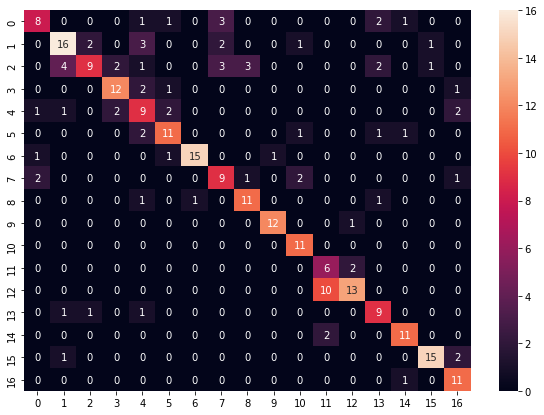




    precision    recall
0    0.500000  0.666667
1    0.640000  0.695652
2    0.360000  0.750000
3    0.750000  0.750000
4    0.529412  0.450000
5    0.687500  0.687500
6    0.833333  0.937500
7    0.600000  0.529412
8    0.785714  0.733333
9    0.923077  0.923077
10   1.000000  0.733333
11   0.750000  0.333333
12   0.565217  0.812500
13   0.750000  0.600000
14   0.846154  0.785714
15   0.833333  0.882353
16   0.916667  0.647059
-------------------------------------------------------

FOLD :  4


-------------------------------------------------------
Model 0 Score :  74.26470588235294
Model 1 Score :  61.39705882352941
Model 2 Score :  61.39705882352941
Model 3 Score :  50.36764705882353
Accuracy Percentage :  74.63235294117646


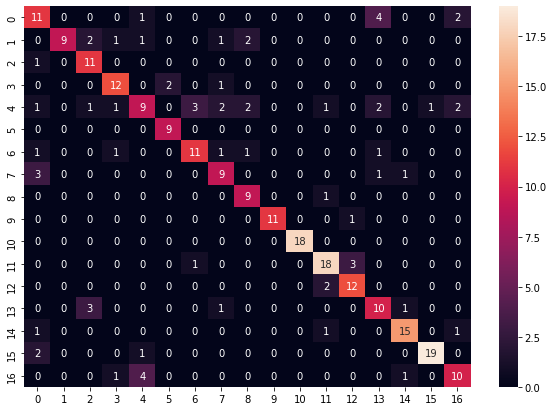




    precision    recall
0    0.611111  0.550000
1    0.562500  1.000000
2    0.916667  0.647059
3    0.800000  0.750000
4    0.360000  0.562500
5    1.000000  0.818182
6    0.687500  0.733333
7    0.642857  0.600000
8    0.900000  0.642857
9    0.916667  1.000000
10   1.000000  1.000000
11   0.818182  0.782609
12   0.857143  0.750000
13   0.666667  0.555556
14   0.833333  0.833333
15   0.863636  0.950000
16   0.625000  0.666667
-------------------------------------------------------

FOLD :  5


-------------------------------------------------------
Model 0 Score :  68.01470588235294
Model 1 Score :  60.66176470588235
Model 2 Score :  61.029411764705884
Model 3 Score :  44.11764705882353
Accuracy Percentage :  69.48529411764706


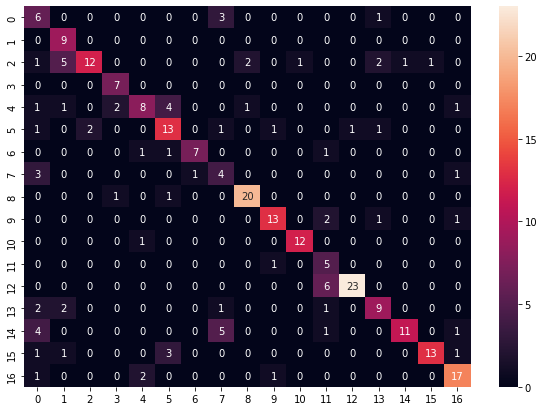




    precision    recall
0    0.600000  0.300000
1    1.000000  0.500000
2    0.480000  0.857143
3    1.000000  0.700000
4    0.444444  0.666667
5    0.650000  0.590909
6    0.700000  0.875000
7    0.444444  0.285714
8    0.909091  0.869565
9    0.764706  0.812500
10   0.923077  0.923077
11   0.833333  0.312500
12   0.793103  0.958333
13   0.600000  0.642857
14   0.500000  0.916667
15   0.684211  0.928571
16   0.809524  0.772727
-------------------------------------------------------
Average Accuracy :  71.54411764705883


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)




def KFold(images,labels):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = MLPClassifier(max_iter=1500,hidden_layer_sizes=(2000,))
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    print('\nFOLD : ', folditer)

    print('\n')

    print('-------------------------------------------------------')

    for i in range(len(models)):
      x_test = arr[i].iloc[test_index]
      print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    print('Accuracy Percentage : ', Accuracy)
    
    ConfusionMatrix(y_predicted,y_test)

    print('-------------------------------------------------------')

  
  print('Average Accuracy : ', avgAccuracy/5)




KFold(images.copy(),labels.copy())


FOLD :  1


-------------------------------------------------------
Model 0 Score :  57.35294117647059
Model 1 Score :  53.67647058823529
Model 2 Score :  52.94117647058824
Model 3 Score :  5.147058823529411
Accuracy Percentage :  60.294117647058826


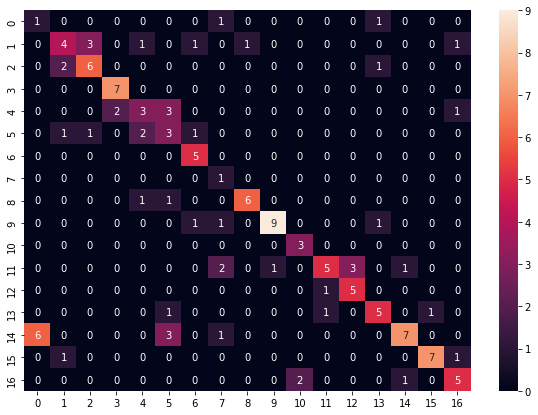




    precision    recall
0    0.333333  0.142857
1    0.363636  0.500000
2    0.666667  0.600000
3    1.000000  0.777778
4    0.333333  0.428571
5    0.375000  0.272727
6    1.000000  0.625000
7    1.000000  0.166667
8    0.750000  0.857143
9    0.750000  0.900000
10   1.000000  0.600000
11   0.416667  0.714286
12   0.833333  0.625000
13   0.625000  0.625000
14   0.411765  0.777778
15   0.777778  0.875000
16   0.625000  0.625000
-------------------------------------------------------

FOLD :  2


-------------------------------------------------------
Model 0 Score :  65.44117647058823
Model 1 Score :  37.5
Model 2 Score :  11.029411764705882
Model 3 Score :  39.705882352941174
Accuracy Percentage :  63.970588235294116


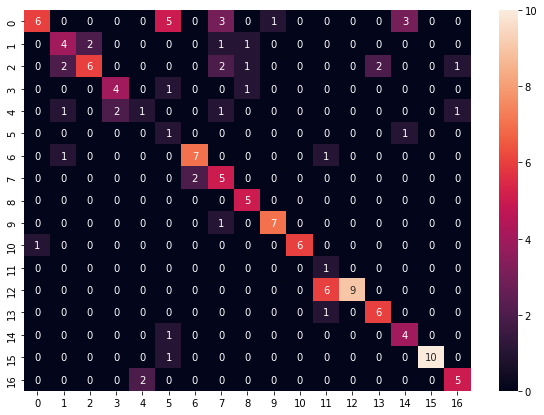




    precision    recall
0    0.333333  0.857143
1    0.500000  0.500000
2    0.428571  0.750000
3    0.666667  0.666667
4    0.166667  0.333333
5    0.500000  0.111111
6    0.777778  0.777778
7    0.714286  0.384615
8    1.000000  0.625000
9    0.875000  0.875000
10   0.857143  1.000000
11   1.000000  0.111111
12   0.600000  1.000000
13   0.857143  0.750000
14   0.800000  0.500000
15   0.909091  1.000000
16   0.714286  0.714286
-------------------------------------------------------

FOLD :  3


-------------------------------------------------------
Model 0 Score :  5.88235294117647
Model 1 Score :  46.32352941176471
Model 2 Score :  52.20588235294118
Model 3 Score :  16.911764705882355
Accuracy Percentage :  36.029411764705884


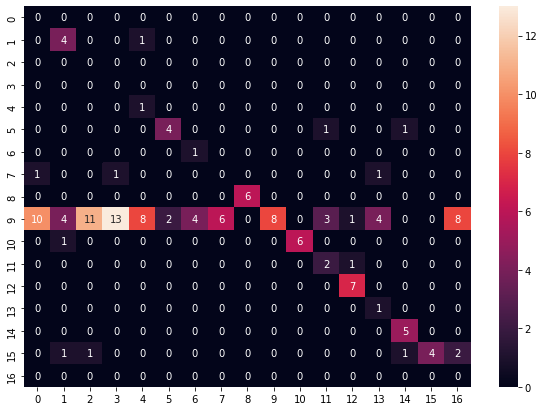




    precision    recall
0         NaN  0.000000
1    0.800000  0.400000
2         NaN  0.000000
3         NaN  0.000000
4    1.000000  0.100000
5    0.666667  0.666667
6    1.000000  0.200000
7    0.000000  0.000000
8    1.000000  1.000000
9    0.097561  1.000000
10   0.857143  1.000000
11   0.666667  0.333333
12   1.000000  0.777778
13   1.000000  0.166667
14   1.000000  0.714286
15   0.444444  1.000000
16        NaN  0.000000
-------------------------------------------------------

FOLD :  4


-------------------------------------------------------
Model 0 Score :  63.970588235294116
Model 1 Score :  63.23529411764706
Model 2 Score :  3.6764705882352944
Model 3 Score :  45.588235294117645
Accuracy Percentage :  65.44117647058823


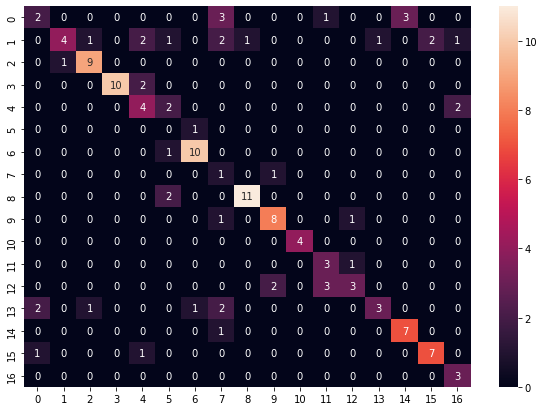




    precision    recall
0    0.222222  0.400000
1    0.266667  0.800000
2    0.900000  0.818182
3    0.833333  1.000000
4    0.500000  0.444444
5    0.000000  0.000000
6    0.909091  0.833333
7    0.500000  0.100000
8    0.846154  0.916667
9    0.800000  0.727273
10   1.000000  1.000000
11   0.750000  0.428571
12   0.375000  0.600000
13   0.333333  0.750000
14   0.875000  0.700000
15   0.777778  0.777778
16   1.000000  0.500000
-------------------------------------------------------

FOLD :  5


-------------------------------------------------------
Model 0 Score :  45.588235294117645
Model 1 Score :  27.205882352941174
Model 2 Score :  13.23529411764706
Model 3 Score :  4.411764705882353
Accuracy Percentage :  33.088235294117645


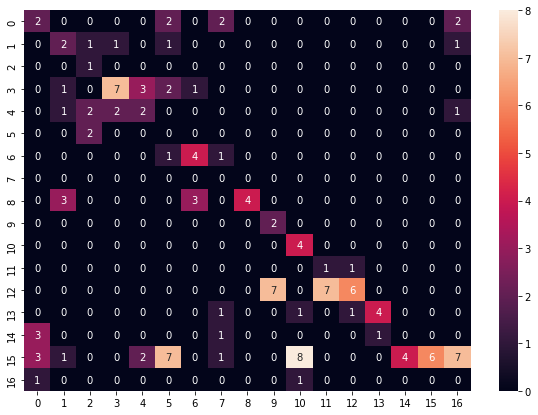




    precision    recall
0    0.250000  0.222222
1    0.333333  0.250000
2    1.000000  0.166667
3    0.500000  0.700000
4    0.250000  0.285714
5    0.000000  0.000000
6    0.666667  0.500000
7         NaN  0.000000
8    0.400000  1.000000
9    1.000000  0.222222
10   1.000000  0.285714
11   0.500000  0.125000
12   0.300000  0.750000
13   0.571429  0.800000
14   0.000000  0.000000
15   0.153846  1.000000
16   0.000000  0.000000
-------------------------------------------------------

FOLD :  6


-------------------------------------------------------
Model 0 Score :  66.91176470588235
Model 1 Score :  64.70588235294117
Model 2 Score :  33.82352941176471
Model 3 Score :  41.17647058823529
Accuracy Percentage :  69.8529411764706


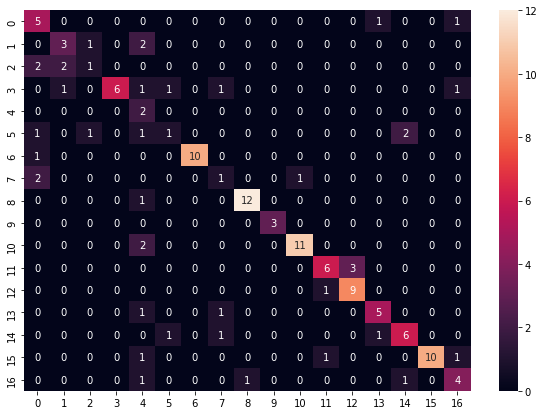




    precision    recall
0    0.714286  0.454545
1    0.500000  0.500000
2    0.200000  0.333333
3    0.545455  1.000000
4    1.000000  0.166667
5    0.166667  0.333333
6    0.909091  1.000000
7    0.250000  0.250000
8    0.923077  0.923077
9    1.000000  1.000000
10   0.846154  0.916667
11   0.666667  0.750000
12   0.900000  0.750000
13   0.714286  0.714286
14   0.666667  0.666667
15   0.769231  1.000000
16   0.571429  0.571429
-------------------------------------------------------

FOLD :  7


-------------------------------------------------------
Model 0 Score :  41.911764705882355
Model 1 Score :  52.20588235294118
Model 2 Score :  5.147058823529411
Model 3 Score :  11.76470588235294
Accuracy Percentage :  44.11764705882353


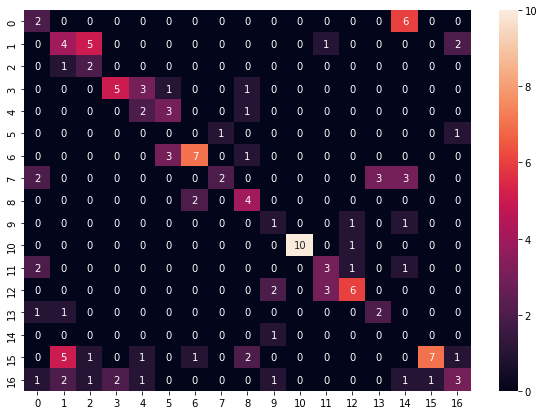




    precision    recall
0    0.250000  0.250000
1    0.333333  0.307692
2    0.666667  0.222222
3    0.500000  0.714286
4    0.333333  0.285714
5    0.000000  0.000000
6    0.636364  0.700000
7    0.200000  0.666667
8    0.666667  0.444444
9    0.333333  0.200000
10   0.909091  1.000000
11   0.428571  0.428571
12   0.545455  0.666667
13   0.500000  0.400000
14   0.000000  0.000000
15   0.388889  0.875000
16   0.230769  0.428571
-------------------------------------------------------

FOLD :  8


-------------------------------------------------------
Model 0 Score :  68.38235294117648
Model 1 Score :  60.29411764705882
Model 2 Score :  30.14705882352941
Model 3 Score :  44.85294117647059
Accuracy Percentage :  68.38235294117646


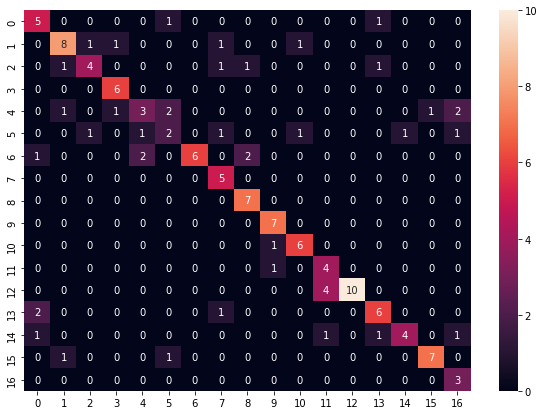




    precision    recall
0    0.714286  0.555556
1    0.666667  0.727273
2    0.500000  0.666667
3    1.000000  0.750000
4    0.300000  0.500000
5    0.250000  0.333333
6    0.545455  1.000000
7    1.000000  0.555556
8    1.000000  0.700000
9    1.000000  0.777778
10   0.857143  0.750000
11   0.800000  0.444444
12   0.714286  1.000000
13   0.666667  0.666667
14   0.500000  0.800000
15   0.777778  0.875000
16   1.000000  0.428571
-------------------------------------------------------

FOLD :  9


-------------------------------------------------------
Model 0 Score :  57.35294117647059
Model 1 Score :  61.029411764705884
Model 2 Score :  2.941176470588235
Model 3 Score :  7.352941176470589
Accuracy Percentage :  56.61764705882353


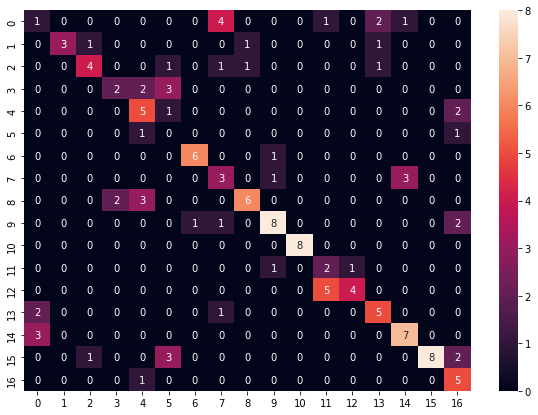




    precision    recall
0    0.111111  0.166667
1    0.500000  1.000000
2    0.500000  0.666667
3    0.285714  0.500000
4    0.625000  0.416667
5    0.000000  0.000000
6    0.857143  0.857143
7    0.428571  0.300000
8    0.545455  0.750000
9    0.666667  0.727273
10   1.000000  1.000000
11   0.500000  0.250000
12   0.444444  0.800000
13   0.625000  0.555556
14   0.700000  0.636364
15   0.571429  1.000000
16   0.833333  0.416667
-------------------------------------------------------

FOLD :  10


-------------------------------------------------------
Model 0 Score :  41.911764705882355
Model 1 Score :  26.47058823529412
Model 2 Score :  10.294117647058822
Model 3 Score :  3.6764705882352944
Accuracy Percentage :  38.23529411764706


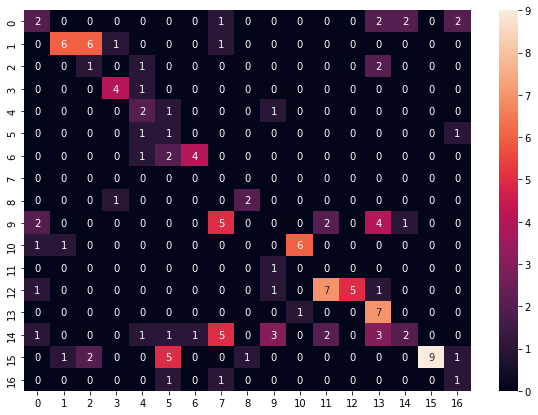




    precision    recall
0    0.222222  0.285714
1    0.428571  0.750000
2    0.250000  0.111111
3    0.800000  0.666667
4    0.500000  0.285714
5    0.333333  0.090909
6    0.571429  0.800000
7         NaN  0.000000
8    0.666667  0.666667
9    0.000000  0.000000
10   0.750000  0.857143
11   0.000000  0.000000
12   0.333333  1.000000
13   0.875000  0.368421
14   0.105263  0.400000
15   0.473684  1.000000
16   0.333333  0.200000
-------------------------------------------------------
Average Accuracy :  53.60294117647059


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)




def KFold(images,labels):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = MLPClassifier(max_iter=1500)
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    print('\nFOLD : ', folditer)

    print('\n')

    print('-------------------------------------------------------')

    for i in range(len(models)):
      x_test = arr[i].iloc[test_index]
      print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    print('Accuracy Percentage : ', Accuracy)
    
    ConfusionMatrix(y_predicted,y_test)

    print('-------------------------------------------------------')

  
  print('Average Accuracy : ', avgAccuracy/10)




KFold(images.copy(),labels.copy())

# Various Combination of Features Using Logistic Regresion || k-fold || k = 5 | k = 10

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)




def KFold(images,labels,arr):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = LogisticRegression()
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    # print('\nFOLD : ', folditer)

    # print('\n')

    # print('-------------------------------------------------------')

    # for i in range(len(models)):
    #   x_test = arr[i].iloc[test_index]
    #   print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    # print('Accuracy Percentage : ', Accuracy)
    
    # ConfusionMatrix(y_predicted,y_test)

    # print('-------------------------------------------------------')

  
  # print('Average Accuracy : ', avgAccuracy/5)
  return avgAccuracy/5




for datasetname,dataset in myDatasets.items():
  print(datasetname + ' Accuracy : ' + str(KFold(images.copy(),labels.copy(),dataset)))

hsv Accuracy : 57.57352941176471
siftint Accuracy : 66.98529411764706
siftbdy Accuracy : 58.01470588235294
hog Accuracy : 49.55882352941176
hsv_siftint Accuracy : 79.11764705882354
hsv_siftbdy Accuracy : 73.16176470588235
hog_siftint Accuracy : 68.8235294117647
hog_siftbdy Accuracy : 61.02941176470588
hsv_hog Accuracy : 69.85294117647058
siftint_siftbdy Accuracy : 69.55882352941177
hsv_siftint_hog Accuracy : 80.44117647058825
hsv_siftint_siftbdy_hog Accuracy : 81.32352941176472


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)




def KFold(images,labels,arr):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = LogisticRegression()
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    # print('\nFOLD : ', folditer)

    # print('\n')

    # print('-------------------------------------------------------')

    # for i in range(len(models)):
    #   x_test = arr[i].iloc[test_index]
    #   print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    # print('Accuracy Percentage : ', Accuracy)
    
    # ConfusionMatrix(y_predicted,y_test)

    # print('-------------------------------------------------------')

  
  # print('Average Accuracy : ', avgAccuracy/5)
  return avgAccuracy/10




for datasetname,dataset in myDatasets.items():
  print(datasetname + ' Accuracy : ' + str(KFold(images.copy(),labels.copy(),dataset)))

hsv Accuracy : 57.794117647058826
siftint Accuracy : 67.27941176470588
siftbdy Accuracy : 59.117647058823515
hog Accuracy : 51.1764705882353
hsv_siftint Accuracy : 80.29411764705881
hsv_siftbdy Accuracy : 74.11764705882354
hog_siftint Accuracy : 70.0
hog_siftbdy Accuracy : 60.36764705882352
hsv_hog Accuracy : 70.22058823529412
siftint_siftbdy Accuracy : 70.80882352941178
hsv_siftint_hog Accuracy : 81.39705882352942
hsv_siftint_siftbdy_hog Accuracy : 83.16176470588236


# Various Combination of Features Using SLP || k-fold || k = 5 | k = 10

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)




def KFold(images,labels,arr):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = MLPClassifier(hidden_layer_sizes=(),max_iter=1500,early_stopping=True,n_iter_no_change = 150)
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    # print('\nFOLD : ', folditer)

    # print('\n')

    # print('-------------------------------------------------------')

    # for i in range(len(models)):
    #   x_test = arr[i].iloc[test_index]
    #   print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    # print('Accuracy Percentage : ', Accuracy)
    
    # ConfusionMatrix(y_predicted,y_test)

    # print('-------------------------------------------------------')

  
  # print('Average Accuracy : ', avgAccuracy/5)
  return avgAccuracy/5




for datasetname,dataset in myDatasets.items():
  print(datasetname + ' Accuracy : ' + str(KFold(images.copy(),labels.copy(),dataset)))

hsv Accuracy : 54.19117647058823
siftint Accuracy : 60.07352941176471
siftbdy Accuracy : 45.367647058823536
hog Accuracy : 46.91176470588235
hsv_siftint Accuracy : 77.72058823529412
hsv_siftbdy Accuracy : 71.83823529411765
hog_siftint Accuracy : 66.10294117647058
hog_siftbdy Accuracy : 58.30882352941177
hsv_hog Accuracy : 68.16176470588235
siftint_siftbdy Accuracy : 62.794117647058826
hsv_siftint_hog Accuracy : 79.41176470588235
hsv_siftint_siftbdy_hog Accuracy : 80.44117647058822


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)




def KFold(images,labels,arr):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = MLPClassifier(hidden_layer_sizes=(),max_iter=1500,early_stopping=True,n_iter_no_change = 150)
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    # print('\nFOLD : ', folditer)

    # print('\n')

    # print('-------------------------------------------------------')

    # for i in range(len(models)):
    #   x_test = arr[i].iloc[test_index]
    #   print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    # print('Accuracy Percentage : ', Accuracy)
    
    # ConfusionMatrix(y_predicted,y_test)

    # print('-------------------------------------------------------')

  
  # print('Average Accuracy : ', avgAccuracy/5)
  return avgAccuracy/10




for datasetname,dataset in myDatasets.items():
  print(datasetname + ' Accuracy : ' + str(KFold(images.copy(),labels.copy(),dataset)))

hsv Accuracy : 57.426470588235304
siftint Accuracy : 61.47058823529411
siftbdy Accuracy : 47.647058823529406
hog Accuracy : 46.911764705882355
hsv_siftint Accuracy : 78.23529411764707
hsv_siftbdy Accuracy : 70.51470588235296
hog_siftint Accuracy : 68.30882352941177
hog_siftbdy Accuracy : 62.205882352941174
hsv_hog Accuracy : 68.23529411764706
siftint_siftbdy Accuracy : 63.97058823529411
hsv_siftint_hog Accuracy : 80.58823529411764
hsv_siftint_siftbdy_hog Accuracy : 80.22058823529412


# Various Combination of Features Using PLA || k-fold || k = 5 | k = 10

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)




def KFold(images,labels,arr):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = Perceptron(max_iter=1500,early_stopping=True,n_iter_no_change = 150,validation_fraction=0.1)
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    # print('\nFOLD : ', folditer)

    # print('\n')

    # print('-------------------------------------------------------')

    # for i in range(len(models)):
    #   x_test = arr[i].iloc[test_index]
    #   print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    # print('Accuracy Percentage : ', Accuracy)
    
    # ConfusionMatrix(y_predicted,y_test)

    # print('-------------------------------------------------------')

  
  # print('Average Accuracy : ', avgAccuracy/5)
  return avgAccuracy/5




for datasetname,dataset in myDatasets.items():
  print(datasetname + ' Accuracy : ' + str(KFold(images.copy(),labels.copy(),dataset)))

hsv Accuracy : 42.720588235294116
siftint Accuracy : 52.57352941176471
siftbdy Accuracy : 36.76470588235294
hog Accuracy : 33.38235294117647
hsv_siftint Accuracy : 70.88235294117648
hsv_siftbdy Accuracy : 57.941176470588246
hog_siftint Accuracy : 58.97058823529412
hog_siftbdy Accuracy : 46.029411764705884
hsv_hog Accuracy : 59.48529411764706
siftint_siftbdy Accuracy : 47.794117647058826
hsv_siftint_hog Accuracy : 73.60294117647058
hsv_siftint_siftbdy_hog Accuracy : 71.17647058823529


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)




def KFold(images,labels,arr):

  avgAccuracy = 0

  imagesShuffled, labelsShuffled = shuffle(images, labels)

  images = imagesShuffled
  labels = labelsShuffled

  
  folditer = 0

  for train_index, test_index in kf.split(np.array(images)):

    models = []

    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    '''
    NOTE :  images contains shuffled indices, labels contains shuffled labels, 
            that's reason for the below 2 lines of code.
    '''

    train_index = [images[i] for i in train_index]
    test_index = [images[i] for i in test_index]




    
    


    for df in arr:
      x_train = df.iloc[train_index]
      model = Perceptron(max_iter=1500,early_stopping=True,n_iter_no_change = 150,validation_fraction=0.1)
      model.fit(x_train, y_train)
      models.append(model)

    folditer += 1
    # print('\nFOLD : ', folditer)

    # print('\n')

    # print('-------------------------------------------------------')

    # for i in range(len(models)):
    #   x_test = arr[i].iloc[test_index]
    #   print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    avgAccuracy += Accuracy
    # print('Accuracy Percentage : ', Accuracy)
    
    # ConfusionMatrix(y_predicted,y_test)

    # print('-------------------------------------------------------')

  
  # print('Average Accuracy : ', avgAccuracy/5)
  return avgAccuracy/10




for datasetname,dataset in myDatasets.items():
  print(datasetname + ' Accuracy : ' + str(KFold(images.copy(),labels.copy(),dataset)))

hsv Accuracy : 42.05882352941176
siftint Accuracy : 48.67647058823529
siftbdy Accuracy : 33.38235294117647
hog Accuracy : 35.36764705882352
hsv_siftint Accuracy : 65.36764705882352
hsv_siftbdy Accuracy : 62.42647058823529
hog_siftint Accuracy : 59.044117647058826
hog_siftbdy Accuracy : 50.44117647058823
hsv_hog Accuracy : 59.705882352941174
siftint_siftbdy Accuracy : 46.617647058823536
hsv_siftint_hog Accuracy : 72.86764705882354
hsv_siftint_siftbdy_hog Accuracy : 72.27941176470588


# Converting image to Gray Scale and then to pixels


Test Accuracy :  26.10294117647059


Model 0 Score :  24.63235294117647
Fold  1
Accuracy :  24.63235294117647


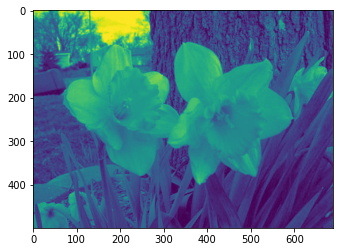

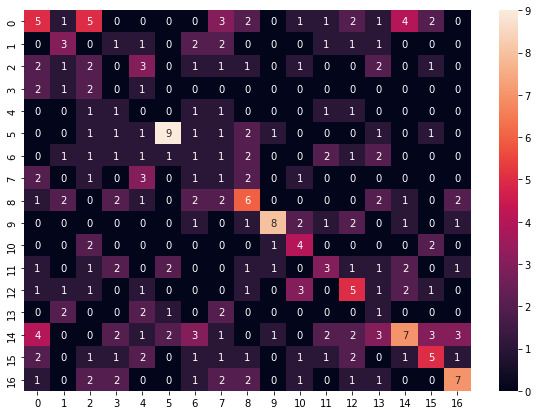




    precision    recall
0    0.185185  0.238095
1    0.250000  0.250000
2    0.133333  0.100000
3    0.000000  0.000000
4    0.000000  0.000000
5    0.473684  0.600000
6    0.071429  0.066667
7    0.090909  0.055556
8    0.285714  0.285714
9    0.470588  0.666667
10   0.444444  0.285714
11   0.187500  0.250000
12   0.294118  0.277778
13   0.125000  0.062500
14   0.205882  0.388889
15   0.250000  0.333333
16   0.350000  0.466667
Model 0 Score :  23.161764705882355
Fold  2
Accuracy :  23.16176470588235


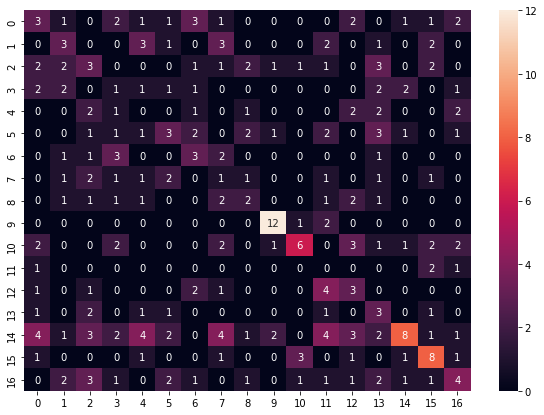




    precision    recall
0    0.166667  0.176471
1    0.200000  0.214286
2    0.157895  0.157895
3    0.076923  0.066667
4    0.000000  0.000000
5    0.166667  0.230769
6    0.272727  0.214286
7    0.083333  0.055556
8    0.166667  0.200000
9    0.800000  0.705882
10   0.272727  0.500000
11   0.000000  0.000000
12   0.250000  0.176471
13   0.300000  0.136364
14   0.190476  0.533333
15   0.470588  0.380952
16   0.190476  0.266667
Model 0 Score :  22.794117647058822
Fold  3
Accuracy :  22.794117647058822


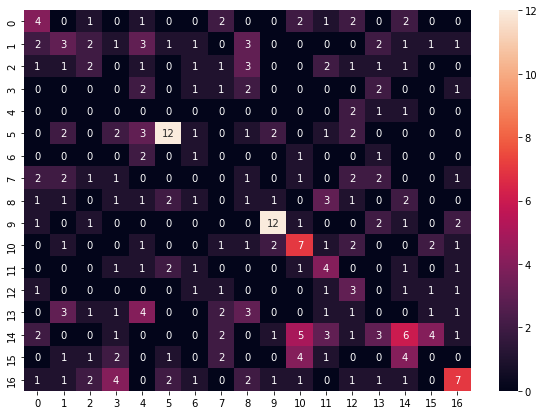




    precision    recall
0    0.266667  0.266667
1    0.142857  0.200000
2    0.133333  0.181818
3    0.000000  0.000000
4    0.000000  0.000000
5    0.461538  0.600000
6    0.200000  0.111111
7    0.000000  0.000000
8    0.066667  0.058824
9    0.600000  0.631579
10   0.368421  0.304348
11   0.333333  0.222222
12   0.300000  0.166667
13   0.000000  0.000000
14   0.206897  0.285714
15   0.000000  0.000000
16   0.280000  0.411765
Model 0 Score :  22.426470588235293
Fold  4
Accuracy :  22.426470588235293


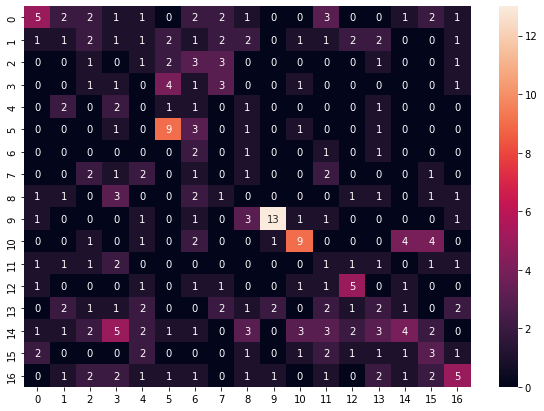




    precision    recall
0    0.217391  0.384615
1    0.050000  0.090909
2    0.083333  0.066667
3    0.083333  0.050000
4    0.000000  0.000000
5    0.562500  0.450000
6    0.400000  0.090909
7    0.000000  0.000000
8    0.000000  0.000000
9    0.590909  0.764706
10   0.409091  0.500000
11   0.100000  0.055556
12   0.416667  0.384615
13   0.105263  0.125000
14   0.121212  0.307692
15   0.200000  0.187500
16   0.238095  0.333333
Model 0 Score :  23.52941176470588
Fold  5
Accuracy :  23.529411764705884


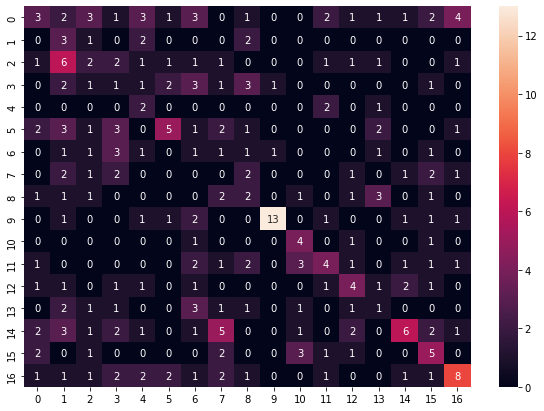




    precision    recall
0    0.107143  0.214286
1    0.375000  0.107143
2    0.105263  0.133333
3    0.062500  0.055556
4    0.400000  0.133333
5    0.238095  0.416667
6    0.083333  0.050000
7    0.000000  0.000000
8    0.153846  0.125000
9    0.590909  0.866667
10   0.571429  0.307692
11   0.235294  0.307692
12   0.285714  0.285714
13   0.083333  0.090909
14   0.222222  0.461538
15   0.333333  0.263158
16   0.333333  0.444444
Average Accuracy :  23.308823529411764


In [ ]:

import sklearn.utils as su
import random
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
import matplotlib.pyplot as plt
import scipy.io as sio

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier

import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # for file editing
import shutil # for console commands
#print(os.listdir("../input"))
#function for downloading from URL 
# if you are using Kaggle, make sure to turn on internet connection and GPU
import tarfile
import urllib
import urllib.request
import cv2 

# Loading image datasets from URL and Transfer learning for image classification using TensorFlow
# Most of the examples for image classification use cifar10 or MNIST image datasets that are in ready to use format. What if we have .jpg image files? This sort of tasks might be rudimentary for experienced data scientists but beginners might find such tasks difficult because of the lack of full fledged examples. They might find snippets of codes that are scattered across Stack exchange and adopting those snippets also require some proficiency in coding. Therefore, I obliged myself to provide a complete example in which we download image dataset in archive format from a URL, load it to our existing pre-trained model and train the model further to classify our image categories.
# I assume the readers have some familiarity with Deep Learning and Tensorflow concepts. The dataset in this code comes from http://www.robots.ox.ac.uk/~vgg/data/flowers/17/. It contains 1360 images of 17 flower categories. Each flower category has 80 images. We will use existing VGG16 pre-trained model without the last output layer to train it on our images. Since we import the model without the last layer, we will be freezing all its layers except for the last one as we need pre-trained weights for our small dataset to adapt. We add our densely connected layer before the output layer, so our transferred model learns the flower dataset. Then we use softmax for predicting 17 categories. As we will see, the model is showing around 94% accuracy for validation sets. This means we don't have overfitting issues. However, we could improve the model by adding L1, L2 regularization and dropouts.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # for file editing
import shutil # for console commands
#print(os.listdir("../input"))
#function for downloading from URL 
# if you are using Kaggle, make sure to turn on internet connection and GPU
import tarfile
import urllib
import urllib.request
import cv2 

# this snippet of code is modified for our use case with additional comments, original source code:
# https://github.com/tflearn/tflearn/blob/master/tflearn/datasets/cifar10.py
def download(filename, source_url, work_directory):
    if not os.path.exists(work_directory): #check if the folder exists; if not make dir
        os.mkdir(work_directory)
    filepath = os.path.join(work_directory, filename)
    if not os.path.exists(filepath): # check if file exists; if not, download
        print("Downloading file, Please wait...")
        filepath, _ = urllib.request.urlretrieve(source_url + filename, # this is a function to download files
                                                 filepath)
        statinfo = os.stat(filepath)
        print(('Succesfully downloaded', filename, statinfo.st_size, 'bytes.'))
        untar(filepath,work_directory)
    return filepath
#only extract jpg files
def jpg_files(members):
    for tarinfo in members:
        if os.path.splitext(tarinfo.name)[1] == ".jpg":
            yield tarinfo
# extract function
def untar(fname,path="17category-flowers-py"): #untarring the archive
    tar = tarfile.open(fname)
    tar.extractall(path="17category-flowers-py", members=jpg_files(tar))
    tar.close()
    if path is "":
        print("File Extracted in Current Directory")
    else:
        print("File Extracted in to ",  path)
download("17flowers.tgz", "http://www.robots.ox.ac.uk/~vgg/data/flowers/17/","17category-flowers-py")



image_size = 128
flag = 1

def load_data(fpath): 

  img=Image.open(fpath).resize((224,224)) # resize to 224x224 for training purposes
  img = cv2.imread(fpath, cv2.IMREAD_GRAYSCALE)
  global flag 
  if((flag)==1):

    plt.imshow(img)

  flag = 0

  img = cv2.resize(img, (image_size, image_size)).flatten()
  np_img=np.asarray(img)

  # print(np_img)
  return np_img

imagesNew=[]
labelsNew=[]
total=1361
j=0
for i in range(1, total): 

  fname="/content/17category-flowers-py/jpg/image_"    
  fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
  np_img = load_data(fpath)
  imagesNew.append(np_img.copy())
  labelsNew.append(j) #labelsNew are created as well
  if i%80==0:
    j+=1


arr = imagesNew

arr = [pd.DataFrame(np.array(imagesNew))]
imagesNew = [i for i in range(1360)]



models = []

from sklearn.utils import shuffle
import random

# imagesNewShuffled, labelsNewShuffled = shuffle(imagesNew, labelsNew)

# imagesNew = imagesNewShuffled
# labelsNew = labelsNewShuffled

labelsNew = [int(y/80) for y in imagesNew]

from sklearn.model_selection import train_test_split
x_train_index, x_test_index, y_train, y_test = train_test_split(imagesNew, labelsNew, test_size=0.2)



print()




models = []


for df in arr:
  x_train = df.iloc[x_train_index]
  model = LogisticRegression()
  model.fit(x_train, y_train)
  models.append(model)


for i in range(len(models)):
  x_test = arr[i].iloc[x_test_index]
  print('Test Accuracy : ',models[i].score(x_test,y_test)*100)


print('\n')

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)


def KFold(imagesNew,labelsNew):

  avgAccuracy = 0

  imagesNewShuffled, labelsNewShuffled = su.shuffle(imagesNew, labelsNew)

  imagesNew = imagesNewShuffled
  labelsNew = labelsNewShuffled

  folditer = 0

  
  

  for train_index, test_index in kf.split(np.array(imagesNew)):

    y_train = [labelsNew[i] for i in train_index]
    y_test = [labelsNew[i] for i in test_index]

    '''
    NOTE :  imagesNew contains shuffled indices, labelsNew contains shuffled labelsNew, 
            that's reason for the below 2 lines of code.
    '''
    
    train_index = [imagesNew[i] for i in train_index]
    test_index = [imagesNew[i] for i in test_index]


    # arr = [x["D_hsv"],x["D_hog"],x["D_siftint"],x["D_siftbdy"]]

    models = []
    


    for a in arr:
      x_train = np.array([a.iloc[i] for i in train_index])
      # model = SGDClassifier(loss="log", penalty="l2", max_iter=1000)
      model = LogisticRegression()
      model.fit(x_train, y_train)
      models.append(model)
      x_test = arr[i].iloc[test_index]
      # print(x_test)
      print('Model '+ str(i) + ' Score : ',models[i].score(x_test,y_test)*100)

    folditer += 1 
    print('Fold ',folditer)

    # for i in range(len(models)):
      

    y_predicted = predictTheClass(test_index,y_test,models,arr)                        
    Accuracy = findAccuracy(y_predicted,y_test)
    print('Accuracy : ',Accuracy)
    avgAccuracy += Accuracy
    ConfusionMatrix(y_predicted,y_test)

    

    


  
  print('Average Accuracy : ', avgAccuracy/5)


# y_predicted = predictTheClass(x_test_index,y_test,models,arr)                        
# ConfusionMatrix(y_predicted,y_test)
# findAccuracy(y_predicted,y_test)

KFold(imagesNew.copy(),labelsNew.copy())




In [ ]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
          {'a': 100, 'b': 200, 'c': 300, 'd': 400},
          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]
df = pd.DataFrame(mydict)
df = df.sample(frac=1)
print(df)
f = [0,2]
print(df.iloc[f])

      a     b     c     d
1   100   200   300   400
0     1     2     3     4
2  1000  2000  3000  4000
      a     b     c     d
1   100   200   300   400
2  1000  2000  3000  4000
